In [6]:
import scipy
import json
import os

import pandas as pd
import seaborn as sns
import scipy.stats

import matplotlib.pyplot as plt

In [1]:
# def load_single_attack_results(
#     scenario: str,
#     version: str,
#     dataset: str
# ):
#     '''Loads json file (attack results) and csv files (Shapley, LOO, Alpha)
#     into a one pandas dataframe'''
    
#     ## Loads the json file with atack metrics
#     metrics = ['Accuracy', 'TPR', 'TNR', 'FPR', 'FNR', 'Advantage', 'AUC']
#     json_path = os.path.join(os.getcwd(), 'attack_results', scenario, version, dataset, 'nodes_attack_results.json')
#     with open(json_path, 'r+') as file:
#         json_file = json.load(file)
#     clients_ids = [int(i) for i in json_file.keys() if i != 'average']
#     iterations = [int(i) for i in json_file['0'].keys()]
#     iterations.sort()
#     headings = [f'{client}_{metric}' for client in clients_ids for metric in metrics]
    
#     dataframe = pd.DataFrame(index=iterations, columns=headings)
    
#     for client in clients_ids:
#         for iteration in iterations:
#             client_data = json_file[str(client)][str(iteration)]['average']
#             for heading in metrics:
#                 dataframe.loc[iteration, f"{client}_{heading}"] = client_data[heading]
    
#     ## 
#     return dataframe

In [7]:
def load_single_contribution_attack_results(
    scenario: str,
    version: str,
    dataset: str
):
    '''Loads json file (attack results) and csv files (Shapley, LOO)
    into a one pandas dataframe'''
    
    ## Loads the json file with atack metrics
    metrics = ['TPR', 'AUC']
    json_path = os.path.join(os.getcwd(), 'attack_results', scenario, version, dataset, 'nodes_attack_results.json')
    shapley_path = os.path.join(os.getcwd(), 'attack_results', scenario, version, dataset, 'results', 'partial_shapley.csv')
    loo_path = os.path.join(os.getcwd(), 'attack_results', scenario, version, dataset, 'results', 'partial_loo.csv')
    with open(json_path, 'r+') as file:
        json_file = json.load(file)
    clients_ids = [int(i) for i in json_file.keys() if i != 'average']
    iterations = [int(i) for i in json_file['0'].keys()]
    iterations.sort()
    headings = [f'{client}_{metric}' for client in clients_ids for metric in metrics]
    
    dataframe = pd.DataFrame(index=iterations, columns=headings)
    
    # Loads attack results into the frame
    for client in clients_ids:
        for iteration in iterations:
            client_data = json_file[str(client)][str(iteration)]['average']
            for heading in metrics:
                dataframe.loc[iteration, f"{client}_{heading}"] = client_data[heading]
    
    # Loads shapley into the frame
    shapley_frame = pd.read_csv(shapley_path)
    loo_frame = pd.read_csv(loo_path)
    for client in clients_ids:
        # Loads shapley values
        array = shapley_frame[shapley_frame['node_id'] == client]['accuracy'].reset_index(drop=True)
        dataframe[f'{client}_SHAP_ACC'] = array
        array = shapley_frame[shapley_frame['node_id'] == client]['f1score'].reset_index(drop=True)
        dataframe[f'{client}_SHAP_F1SCORE'] = array
        
        # Loads LOO values
        array = loo_frame[shapley_frame['node_id'] == client]['accuracy'].reset_index(drop=True)
        dataframe[f'{client}_LOO_ACC'] = array
        array = loo_frame[shapley_frame['node_id'] == client]['f1score'].reset_index(drop=True)
        dataframe[f'{client}_LOO_F1SCORE'] = array
    
    return dataframe

In [8]:
def load_single_contribution_attack_results(
    scenario: str,
    version: str,
    dataset: str
):
    '''Loads json file (attack results) and csv files (Shapley, LOO)
    into a one pandas dataframe'''
    
    ## Loads the json file with atack metrics
    metrics = ['TPR', 'AUC']
    json_path = os.path.join(os.getcwd(), 'attack_results', scenario, version, dataset, 'nodes_attack_results.json')
    shapley_path = os.path.join(os.getcwd(), 'attack_results', scenario, version, dataset, 'results', 'partial_shapley.csv')
    loo_path = os.path.join(os.getcwd(), 'attack_results', scenario, version, dataset, 'results', 'partial_loo.csv')
    with open(json_path, 'r+') as file:
        json_file = json.load(file)
    clients_ids = [int(i) for i in json_file.keys() if i != 'average']
    iterations = [int(i) for i in json_file['0'].keys()]
    iterations.sort()
    headings = [f'{client}_{metric}' for client in clients_ids for metric in metrics]
    
    dataframe = pd.DataFrame(index=iterations, columns=headings)
    
    # Loads attack results into the frame
    for client in clients_ids:
        for iteration in iterations:
            client_data = json_file[str(client)][str(iteration)]['average']
            for heading in metrics:
                dataframe.loc[iteration, f"{client}_{heading}"] = client_data[heading]
    
    # Loads shapley into the frame
    shapley_frame = pd.read_csv(shapley_path)
    loo_frame = pd.read_csv(loo_path)
    for client in clients_ids:
        # Loads shapley values
        array = shapley_frame[shapley_frame['node_id'] == client]['accuracy'].reset_index(drop=True)
        dataframe[f'{client}_SHAP_ACC'] = array
        array = shapley_frame[shapley_frame['node_id'] == client]['f1score'].reset_index(drop=True)
        dataframe[f'{client}_SHAP_F1SCORE'] = array
        
        # Loads LOO values
        array = loo_frame[shapley_frame['node_id'] == client]['accuracy'].reset_index(drop=True)
        dataframe[f'{client}_LOO_ACC'] = array
        array = loo_frame[shapley_frame['node_id'] == client]['f1score'].reset_index(drop=True)
        dataframe[f'{client}_LOO_F1SCORE'] = array
    
    return dataframe

In [9]:
def load_multiple_contribution_attack_results(
    scenarios: list[str],
    versions: list[str],
    datasets: list[str]
):
    all_results = {
        f"{scenario}_{version}_{dataset}" : None
        for scenario in scenarios
        for version in versions
        for dataset in datasets
    }
    for scenario in scenarios:
        for version in versions:
            for dataset in datasets:
                key = f"{scenario}_{version}_{dataset}"
                all_results[key] = load_single_contribution_attack_results(
                    scenario=scenario,
                    version=version,
                    dataset=dataset
                    )
    return all_results

In [10]:
def calculate_single_corr(
    no_clients: int,
    frame: pd.DataFrame,
    mode: 'str'
):
    if mode == 'spearman':
        correlation = scipy.stats.spearmanr
    elif mode =='pearson':
        correlation = scipy.stats.pearsonr
    else:
        assert NameError
    corr_frame = pd.DataFrame(index=range(no_clients))
    
    for client in range(no_clients):
        corr_frame.loc[client, 'TPR_TO_SHAP_ACC'] = correlation(
            frame[f'{client}_TPR'],
            frame[f'{client}_SHAP_ACC']
        ).statistic
        corr_frame.loc[client, 'AUC_TO_SHAP_ACC'] = correlation(
            frame[f'{client}_AUC'],
            frame[f'{client}_SHAP_ACC']
        ).statistic
        corr_frame.loc[client, 'TPR_TO_SHAP_F1SCORE'] = correlation(
            frame[f'{client}_TPR'],
            frame[f'{client}_SHAP_F1SCORE']
        ).statistic
        corr_frame.loc[client, 'AUC_TO_SHAP_F1SCORE'] = correlation(
            frame[f'{client}_AUC'],
            frame[f'{client}_SHAP_F1SCORE']
        ).statistic
        
        corr_frame.loc[client, 'TPR_TO_LOO_ACC'] = correlation(
            frame[f'{client}_TPR'],
            frame[f'{client}_LOO_ACC']
        ).statistic
        corr_frame.loc[client, 'AUC_TO_LOO_ACC'] = correlation(
            frame[f'{client}_AUC'],
            frame[f'{client}_LOO_ACC']
        ).statistic
        corr_frame.loc[client, 'TPR_TO_LOO_F1SCORE'] = correlation(
            frame[f'{client}_TPR'],
            frame[f'{client}_LOO_F1SCORE']
        ).statistic
        corr_frame.loc[client, 'AUC_TO_LOO_F1SCORE'] = correlation(
            frame[f'{client}_AUC'],
            frame[f'{client}_LOO_F1SCORE']
        ).statistic
    return corr_frame

In [23]:
def calculate_single_corr_short(
    no_clients: int,
    frame: pd.DataFrame,
    mode: 'str'
):
    if mode == 'spearman':
        correlation = scipy.stats.spearmanr
    elif mode =='pearson':
        correlation = scipy.stats.pearsonr
    else:
        assert NameError
    corr_frame = pd.DataFrame(index=range(no_clients))
    
    for client in range(no_clients):
        corr = correlation(
            frame[f'{client}_TPR'],
            frame[f'{client}_SHAP_ACC']
        )
        corr_frame.loc[client, 'TPR_TO_SHAP_ACC CORR'] = corr.statistic
        corr_frame.loc[client, 'TPR_TO_SHAP_ACC P-VALUE'] = corr.pvalue
        
        corr = correlation(
            frame[f'{client}_TPR'],
            frame[f'{client}_SHAP_F1SCORE']
        )
        
        corr_frame.loc[client, 'TPR_TO_SHAP_F1SCORE'] = corr.statistic
        corr_frame.loc[client, 'TPR_TO_SHAP_F1SCORE P-VALUE'] = corr.pvalue
        
    return corr_frame

In [20]:
def calculate_multiple_corr_short(
    results : dict,
    no_clients : int,
    mode : str
):
    all_results = {key:None for key in results.keys()}
    for key, frame in results.items():
        all_results[key] = calculate_single_corr_short(frame=frame, no_clients=no_clients, mode=mode)
    return all_results

In [11]:
def calculate_multiple_corr(
    results : dict,
    no_clients : int,
    mode : str
):
    all_results = {key:None for key in results.keys()}
    for key, frame in results.items():
        all_results[key] = calculate_single_corr(frame=frame, no_clients=no_clients, mode=mode)
    return all_results

In [12]:
def calculate_single_pvalue(
    no_clients: int,
    frame: pd.DataFrame,
    mode: 'str'
):
    if mode == 'spearman':
        correlation = scipy.stats.spearmanr
    elif mode =='pearson':
        correlation = scipy.stats.pearsonr
    else:
        assert NameError
    corr_frame = pd.DataFrame(index=range(no_clients))
    
    for client in range(no_clients):
        corr_frame.loc[client, 'TPR_TO_SHAP_ACC'] = correlation(
            frame[f'{client}_TPR'],
            frame[f'{client}_SHAP_ACC']
        ).pvalue
        corr_frame.loc[client, 'AUC_TO_SHAP_ACC'] = correlation(
            frame[f'{client}_AUC'],
            frame[f'{client}_SHAP_ACC']
        ).pvalue
        corr_frame.loc[client, 'TPR_TO_SHAP_F1SCORE'] = correlation(
            frame[f'{client}_TPR'],
            frame[f'{client}_SHAP_F1SCORE']
        ).pvalue
        corr_frame.loc[client, 'AUC_TO_SHAP_F1SCORE'] = correlation(
            frame[f'{client}_AUC'],
            frame[f'{client}_SHAP_F1SCORE']
        ).pvalue
        
        corr_frame.loc[client, 'TPR_TO_LOO_ACC'] = correlation(
            frame[f'{client}_TPR'],
            frame[f'{client}_LOO_ACC']
        ).pvalue
        corr_frame.loc[client, 'AUC_TO_LOO_ACC'] = correlation(
            frame[f'{client}_AUC'],
            frame[f'{client}_LOO_ACC']
        ).pvalue
        corr_frame.loc[client, 'TPR_TO_LOO_F1SCORE'] = correlation(
            frame[f'{client}_TPR'],
            frame[f'{client}_LOO_F1SCORE']
        ).pvalue
        corr_frame.loc[client, 'AUC_TO_LOO_F1SCORE'] = correlation(
            frame[f'{client}_AUC'],
            frame[f'{client}_LOO_F1SCORE']
        ).pvalue
    return corr_frame

In [13]:
def calculate_multiple_pvalues(
    results : dict,
    no_clients : int,
    mode : str
):
    all_results = {key:None for key in results.keys()}
    for key, frame in results.items():
        all_results[key] = calculate_single_pvalue(frame=frame, no_clients=no_clients, mode=mode)
    return all_results

In [ ]:
# def load_single_attack_results_short(
#     scenario: str,
#     version: str,
#     dataset: str
# ):
#     '''Loads json file (attack results) and csv files (Shapley, LOO, Alpha)
#     into a one pandas dataframe'''
    
#     ## Loads the json file with atack metrics
#     metrics = ['TPR', 'AUC']
#     json_path = os.path.join(os.getcwd(), 'attack_results', scenario, version, dataset, 'nodes_attack_results.json')
#     with open(json_path, 'r+') as file:
#         json_file = json.load(file)
#     clients_ids = [int(i) for i in json_file.keys() if i != 'average']
#     iterations = [int(i) for i in json_file['0'].keys()]
#     iterations.sort()
#     headings = [f'{client}_{metric}' for client in clients_ids for metric in metrics]
    
#     dataframe = pd.DataFrame(index=iterations, columns=headings)
    
#     for client in clients_ids:
#         for iteration in iterations:
#             client_data = json_file[str(client)][str(iteration)]['average']
#             for heading in metrics:
#                 dataframe.loc[iteration, f"{client}_{heading}"] = client_data[heading]
    
#     dataframe = dataframe.iloc[-10:].mean()
#     return dataframe

In [ ]:
# def load_all_attack_results_short(
#     scenarios: list[str],
#     versions: list[str],
#     datasets: list[str]
# ):
#     '''Loads json file (attack results) and csv files (Shapley, LOO, Alpha)
#     into a one pandas dataframe'''
    
#     metrics = ['TPR', 'AUC']
#     mapping_dict = {
#         "hs":"highly_skewed",
#         "ls":"lightly_skewed",
#         "uniform":"uniform"
#     }
#     rows = [f"{scenario}_{version}_{dataset}" for scenario in scenarios for version in versions for dataset in datasets]
#     columns = [f'{node}_{metric}' for node in range(8) for metric in metrics]
#     all_dataframe = pd.DataFrame(index=rows, columns=columns)
    
#     for scenario in scenarios:
#         for version in versions:
#             for dataset in datasets:
#                 # Defining Paths
#                 json_path = os.path.join(os.getcwd(), 'attack_results', scenario, version, dataset, 'nodes_attack_results.json')
#                 shapley_path = os.path.join(os.getcwd(), 'attack_results', scenario, version, dataset, 'results', 'full_shapley.csv')
#                 loo_path = os.path.join(os.getcwd(), 'attack_results', scenario, version, dataset, 'results', 'full_loo.csv')
#                 alpha_path = os.path.join(os.getcwd(), 'attack_results', scenario, version, dataset, 'results', 'full_alpha.csv')
#                 # Opening Files
#                 with open(json_path, 'r+') as file:
#                     json_file = json.load(file)
#                 shapley_frame, loo_frame, alpha_frame = pd.read_csv(shapley_path), pd.read_csv(loo_path), pd.read_csv(alpha_path)
                
#                 # Defining number of itertions and number of clients
#                 clients_ids = [int(i) for i in json_file.keys() if i != 'average']
#                 iterations = [int(i) for i in json_file['0'].keys()]
#                 iterations.sort()
#                 headings = [f'{client}_{metric}' for client in clients_ids for metric in metrics]
                
#                 # Populating DataFrame
#                 dataframe = pd.DataFrame(index=iterations, columns=headings)
#                 for client in clients_ids:
#                     for iteration in iterations:
#                         client_data = json_file[str(client)][str(iteration)]['average']
#                         for heading in metrics:
#                             dataframe.loc[iteration, f"{client}_{heading}"] = client_data[heading]

#                 # Inserting summary statistics into the final dataframe
#                 all_dataframe.loc[f"{scenario}_{version}_{dataset}", :] = dataframe.iloc[-10:].mean()
#                 for client in clients_ids:
#                     shapley_score = shapley_frame[shapley_frame['node_id'] == client]
#                     loo_score = loo_frame[loo_frame['node_id'] == client]
#                     #alpha_score = alpha_frame[alpha_frame['node_id'] == client]
#                     all_dataframe.loc[f"{scenario}_{version}_{dataset}", f"{client}_ACC_SHAP"] = shapley_score['accuracy'][client]
#                     all_dataframe.loc[f"{scenario}_{version}_{dataset}", f"{client}_ACC_LOO"] = loo_score['accuracy'][client]
                
#     return all_dataframe

# Experiment I
RQ: What is the correlation between marginal contribution calculated each round (vector of scalars) and MIA's AUC or TPR (vector of scalars) for DP setting and a non-DP setting?

## Method A: Pearson

### Experiment I, Method A: MNIST

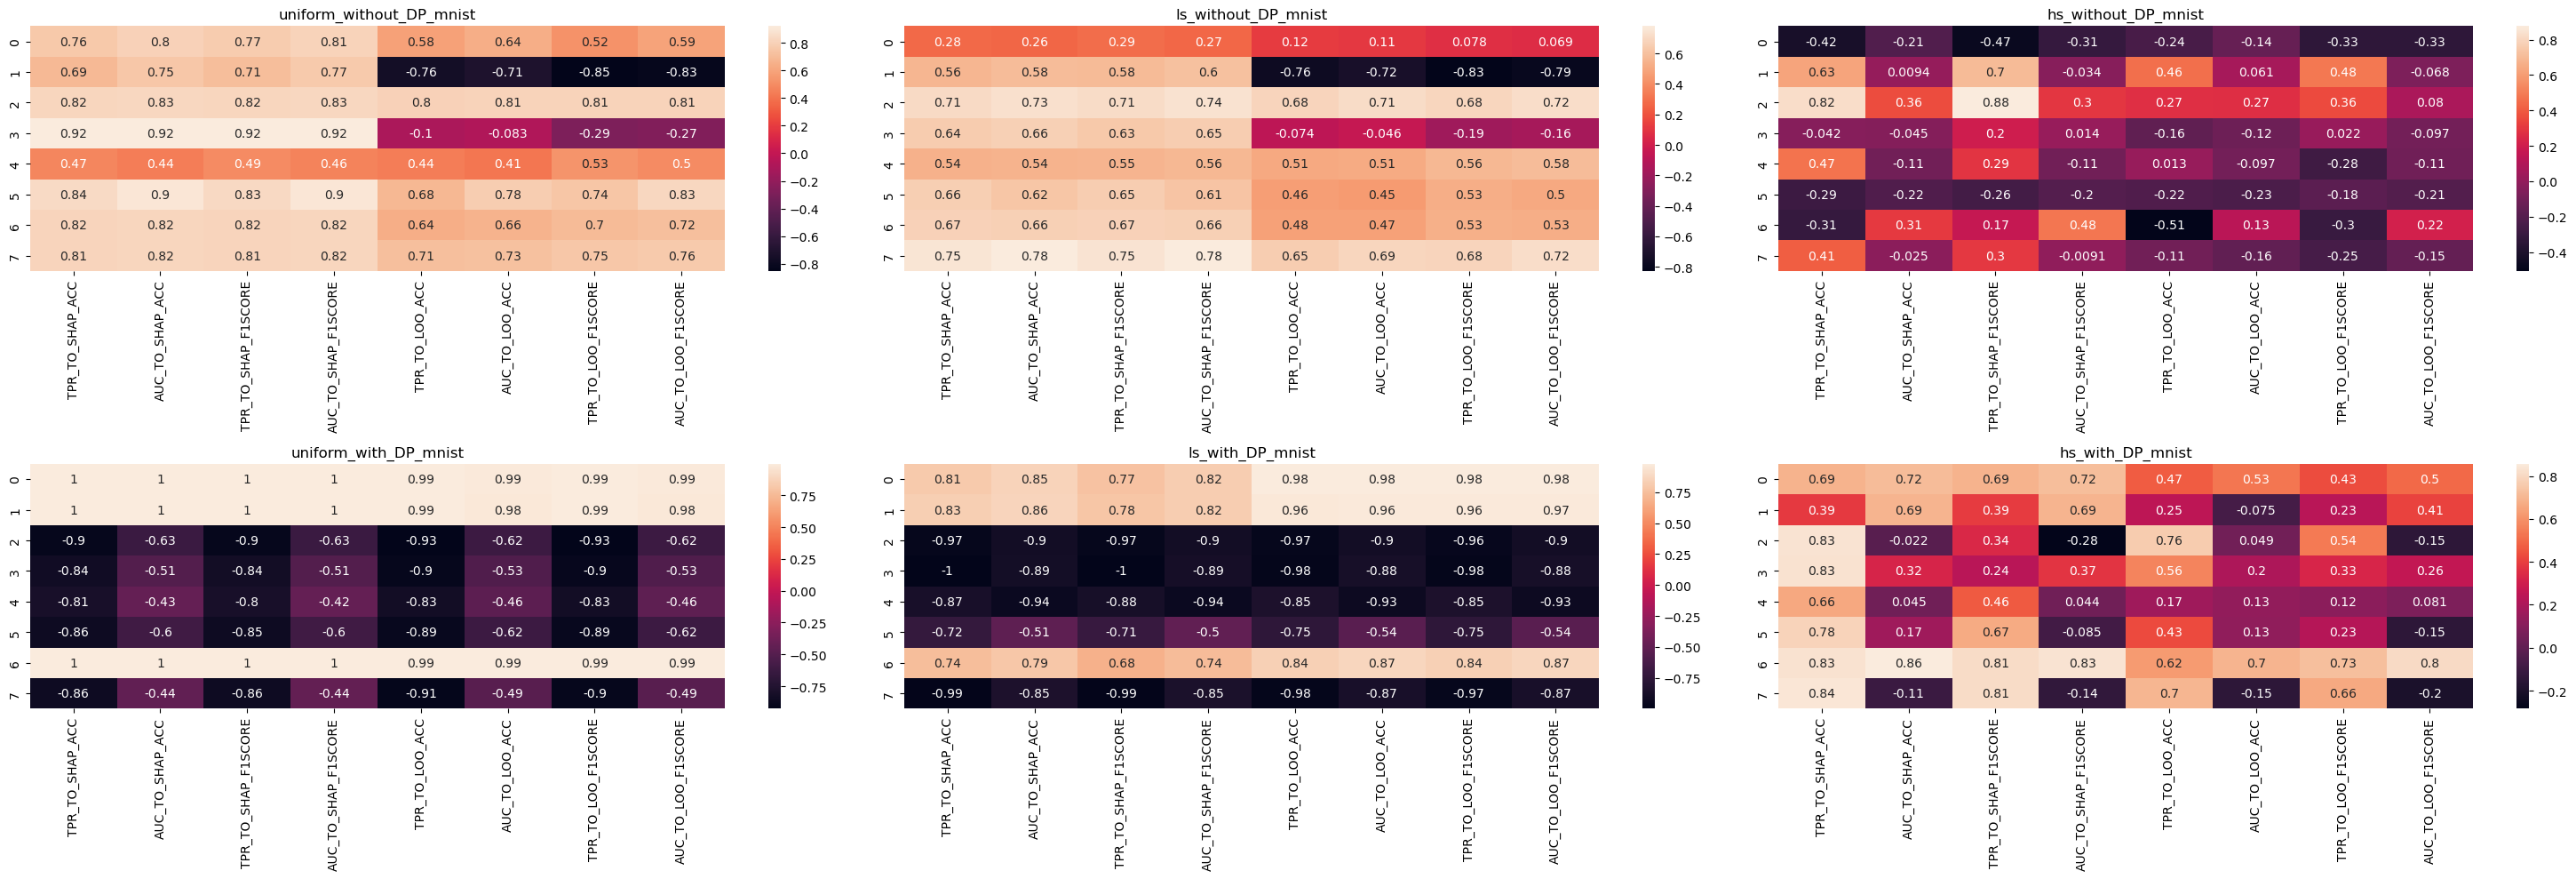

In [14]:
datasets = ['mnist']
scenarios = ['uniform', 'ls', 'hs']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 10))

versions = ['without_DP']
results_wo_DP = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)
corr_wo_DP = calculate_multiple_corr(
    results=results_wo_DP,
    no_clients=8,
    mode='pearson'
    )
for (key, item), ax in zip(corr_wo_DP.items(), axes[0,:]):
    sns.heatmap(item, ax=ax, annot=True)
    ax.set_title(key)

versions = ['with_DP']
results_w_DP = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)
corr_w_DP = calculate_multiple_corr(
    results=results_w_DP,
    no_clients=8,
    mode='pearson'
    )
for (key, item), ax in zip(corr_w_DP.items(), axes[1,:]):
    sns.heatmap(item, ax=ax, annot=True)
    ax.set_title(key)
    
fig.tight_layout()

### Experiment I, Method A: FMNIST

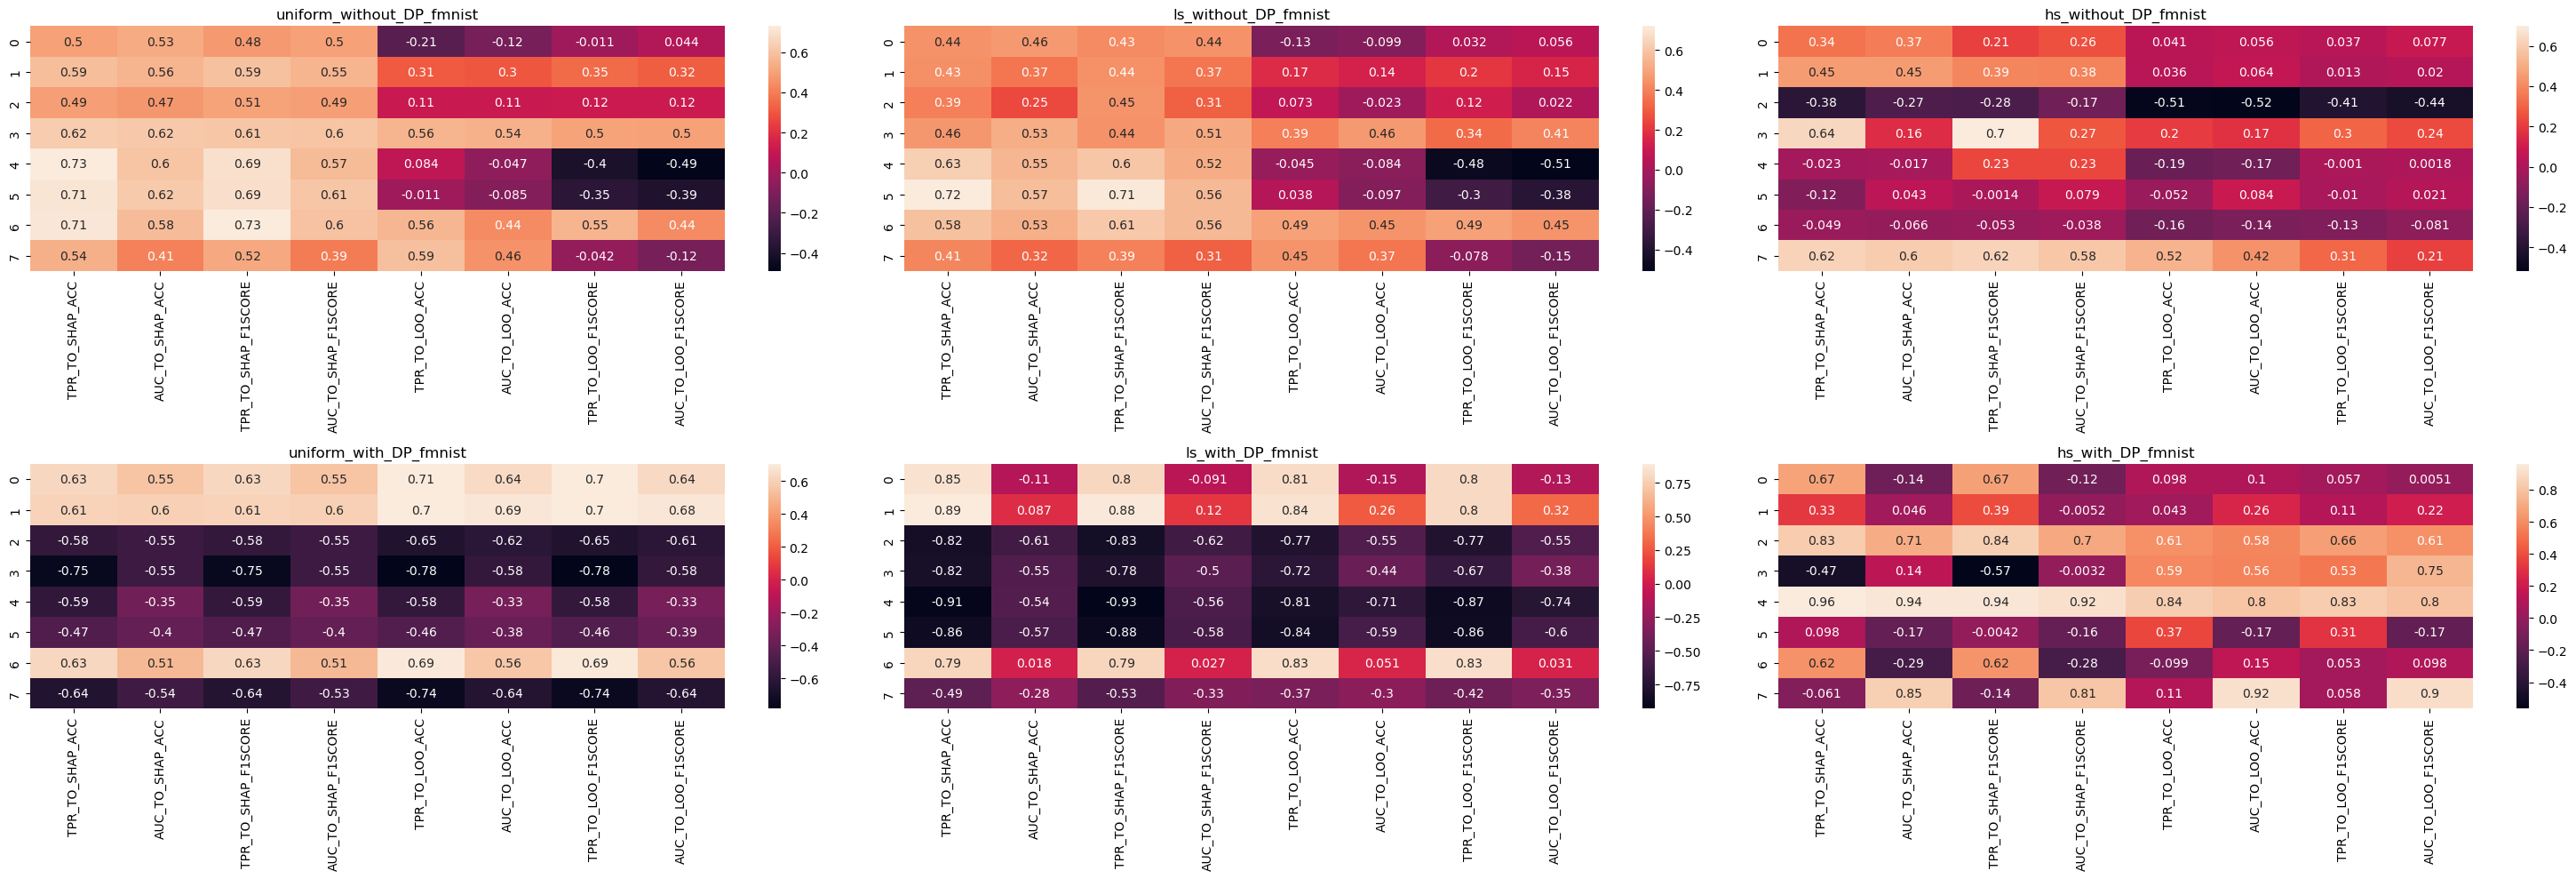

In [15]:
datasets = ['fmnist']
scenarios = ['uniform', 'ls', 'hs']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 10))

versions = ['without_DP']
results_wo_DP = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)
corr_wo_DP = calculate_multiple_corr(
    results=results_wo_DP,
    no_clients=8,
    mode='pearson'
    )
for (key, item), ax in zip(corr_wo_DP.items(), axes[0,:]):
    sns.heatmap(item, ax=ax, annot=True)
    ax.set_title(key)

versions = ['with_DP']
results_w_DP = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)
corr_w_DP = calculate_multiple_corr(
    results=results_w_DP,
    no_clients=8,
    mode='pearson'
    )
for (key, item), ax in zip(corr_w_DP.items(), axes[1,:]):
    sns.heatmap(item, ax=ax, annot=True)
    ax.set_title(key)
    
fig.tight_layout()

### Experiment I, Method A: CIFAR10

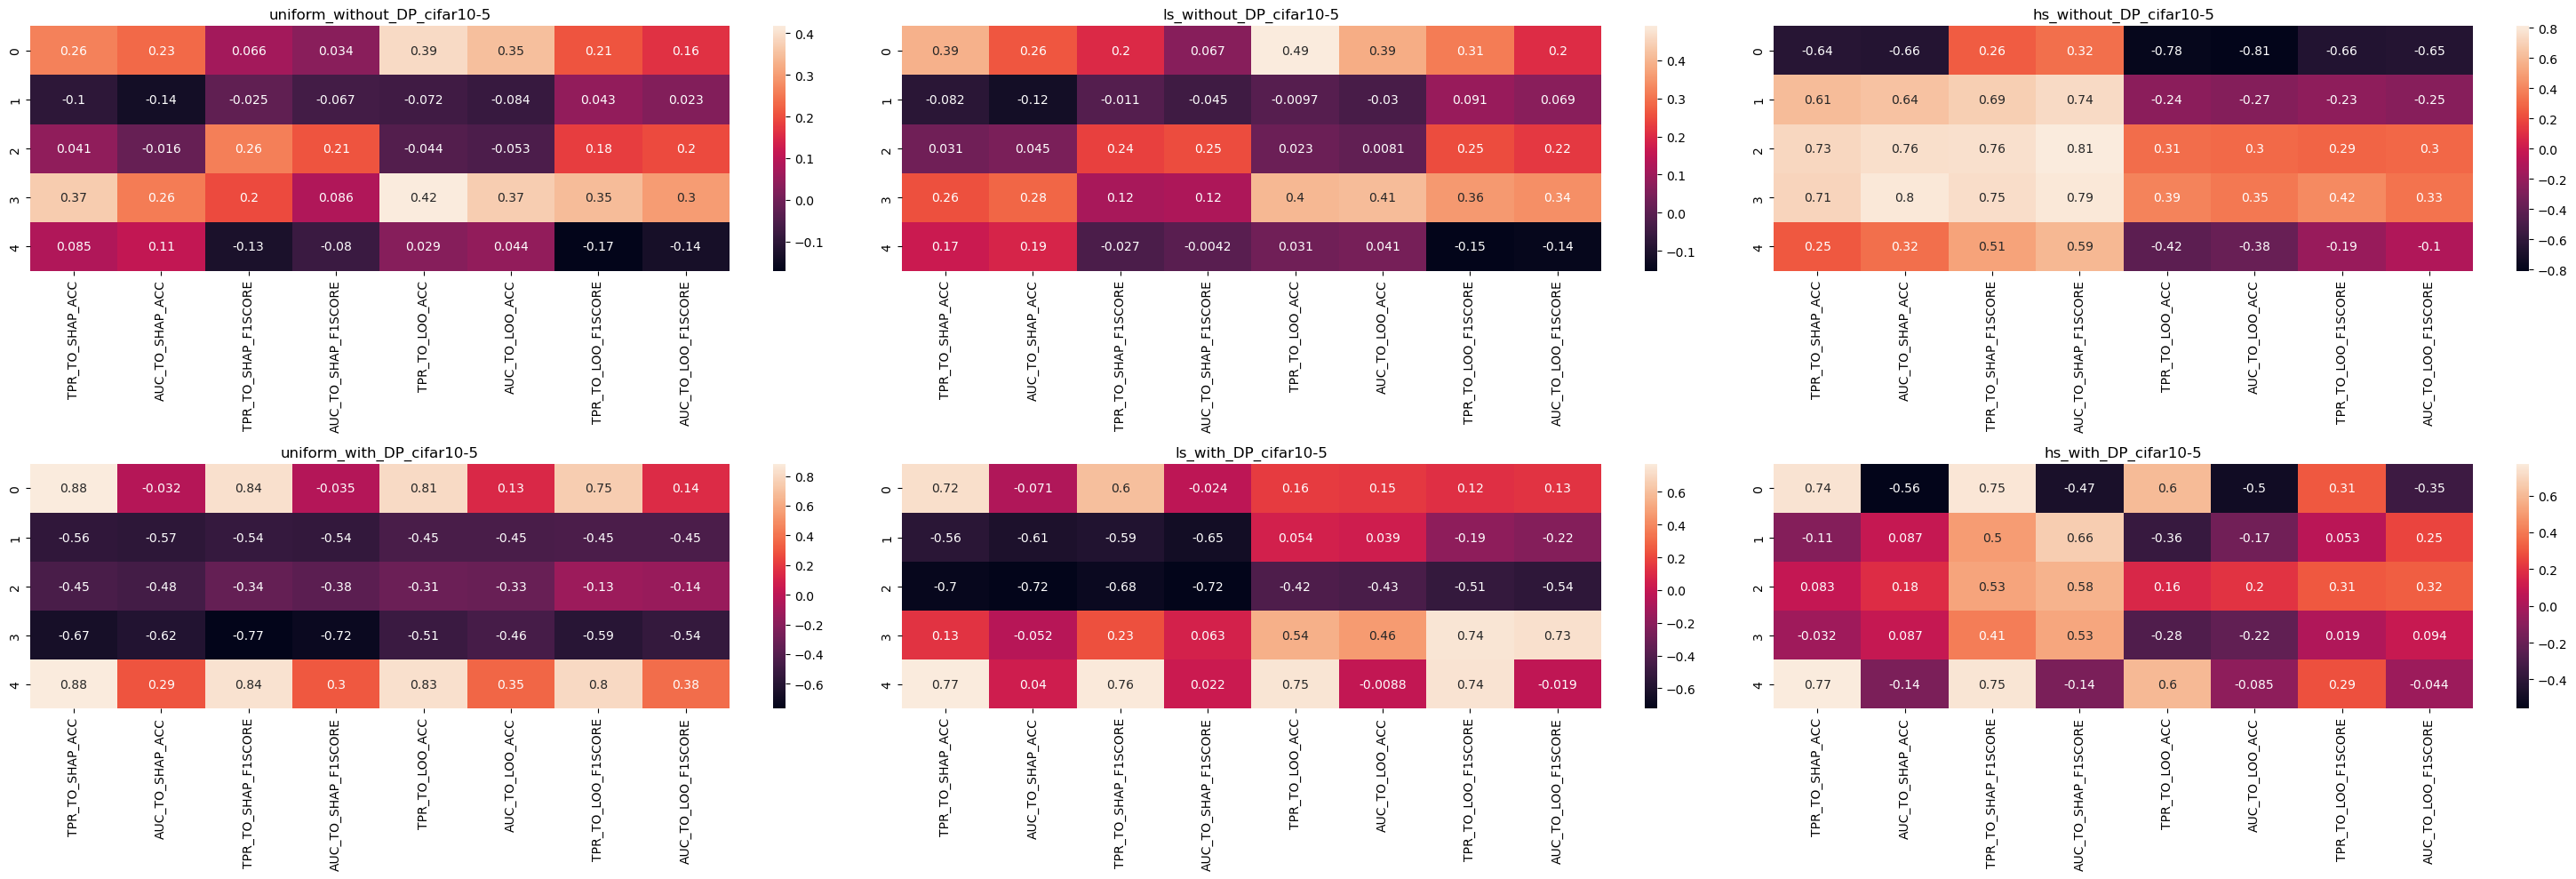

In [16]:
datasets = ['cifar10-5']
scenarios = ['uniform', 'ls', 'hs']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 10))

versions = ['without_DP']
results_wo_DP = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)
corr_wo_DP = calculate_multiple_corr(
    results=results_wo_DP,
    no_clients=5,
    mode='pearson'
    )
for (key, item), ax in zip(corr_wo_DP.items(), axes[0,:]):
    sns.heatmap(item, ax=ax, annot=True)
    ax.set_title(key)

versions = ['with_DP']
results_w_DP = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)
corr_w_DP = calculate_multiple_corr(
    results=results_w_DP,
    no_clients=5,
    mode='pearson'
    )
for (key, item), ax in zip(corr_w_DP.items(), axes[1,:]):
    sns.heatmap(item, ax=ax, annot=True)
    ax.set_title(key)
    
fig.tight_layout()

### Experiment I, Method A: TissueMNIST

In [ ]:
# datasets = ['tissuemnist']
# scenarios = ['uniform', 'ls', 'hs']
# fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 10))

# versions = ['without_DP']
# results_wo_DP = load_multiple_contribution_attack_results(
#     datasets=datasets,
#     scenarios=scenarios,
#     versions=versions
# )
# corr_wo_DP = calculate_multiple_corr(
#     results=results_wo_DP,
#     no_clients=5,
#     mode='pearson'
#     )
# for (key, item), ax in zip(corr_wo_DP.items(), axes[0,:]):
#     sns.heatmap(item, ax=ax, annot=True)
#     ax.set_title(key)

# versions = ['with_DP']
# results_w_DP = load_multiple_contribution_attack_results(
#     datasets=datasets,
#     scenarios=scenarios,
#     versions=versions
# )
# corr_w_DP = calculate_multiple_corr(
#     results=results_w_DP,
#     no_clients=5,
#     mode='pearson'
#     )
# for (key, item), ax in zip(corr_w_DP.items(), axes[1,:]):
#     sns.heatmap(item, ax=ax, annot=True)
#     ax.set_title(key)
    
# fig.tight_layout()

## Method B: Spearman

### Experiment I, Method B: MNIST

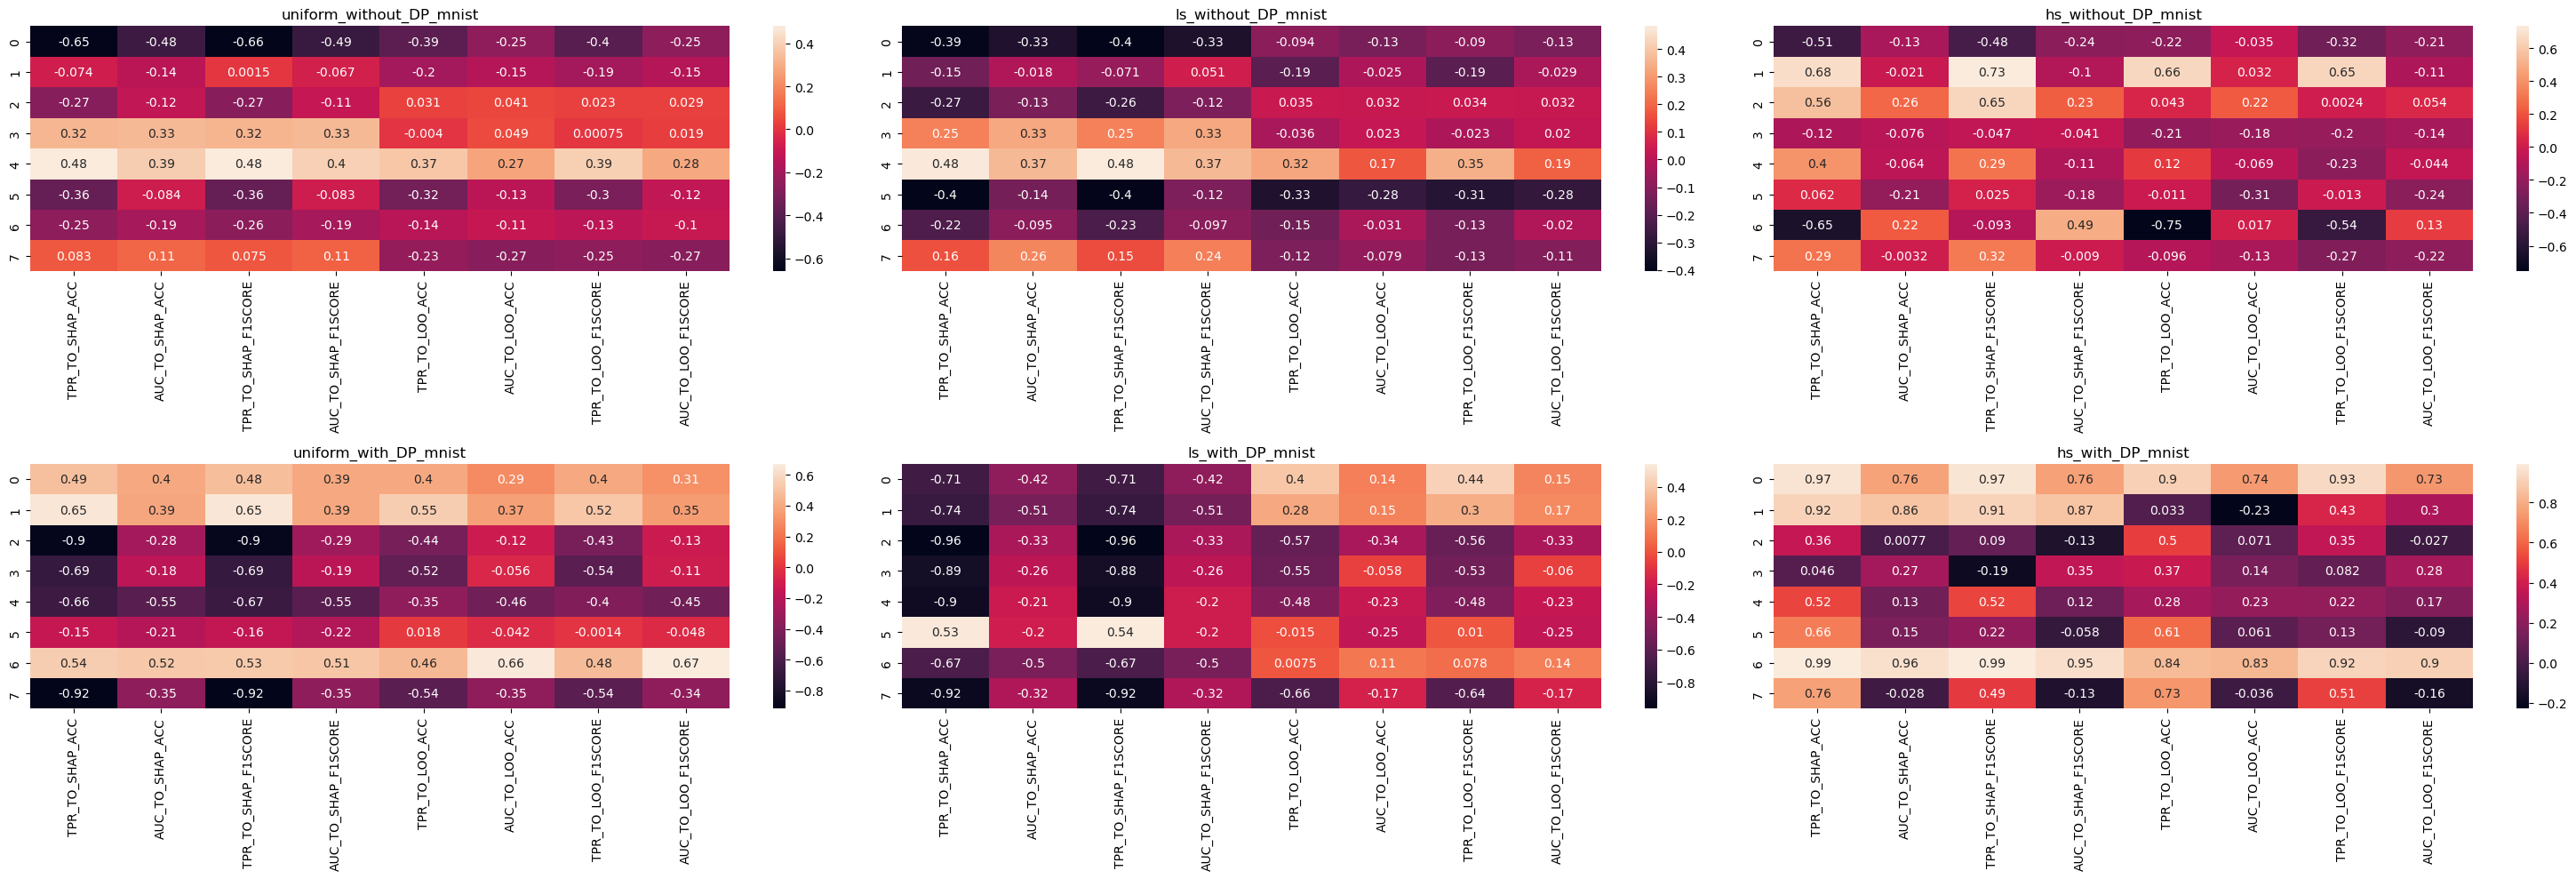

In [ ]:
datasets = ['mnist']
scenarios = ['uniform', 'ls', 'hs']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 10))

versions = ['without_DP']
results_wo_DP = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)
corr_wo_DP = calculate_multiple_corr(
    results=results_wo_DP,
    no_clients=8,
    mode='spearman'
    )
for (key, item), ax in zip(corr_wo_DP.items(), axes[0,:]):
    sns.heatmap(item, ax=ax, annot=True)
    ax.set_title(key)

versions = ['with_DP']
results_w_DP = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)
corr_w_DP = calculate_multiple_corr(
    results=results_w_DP,
    no_clients=8,
    mode='spearman'
    )
for (key, item), ax in zip(corr_w_DP.items(), axes[1,:]):
    sns.heatmap(item, ax=ax, annot=True)
    ax.set_title(key)
    
fig.tight_layout()

# Experiment I, Method B: FMNIST

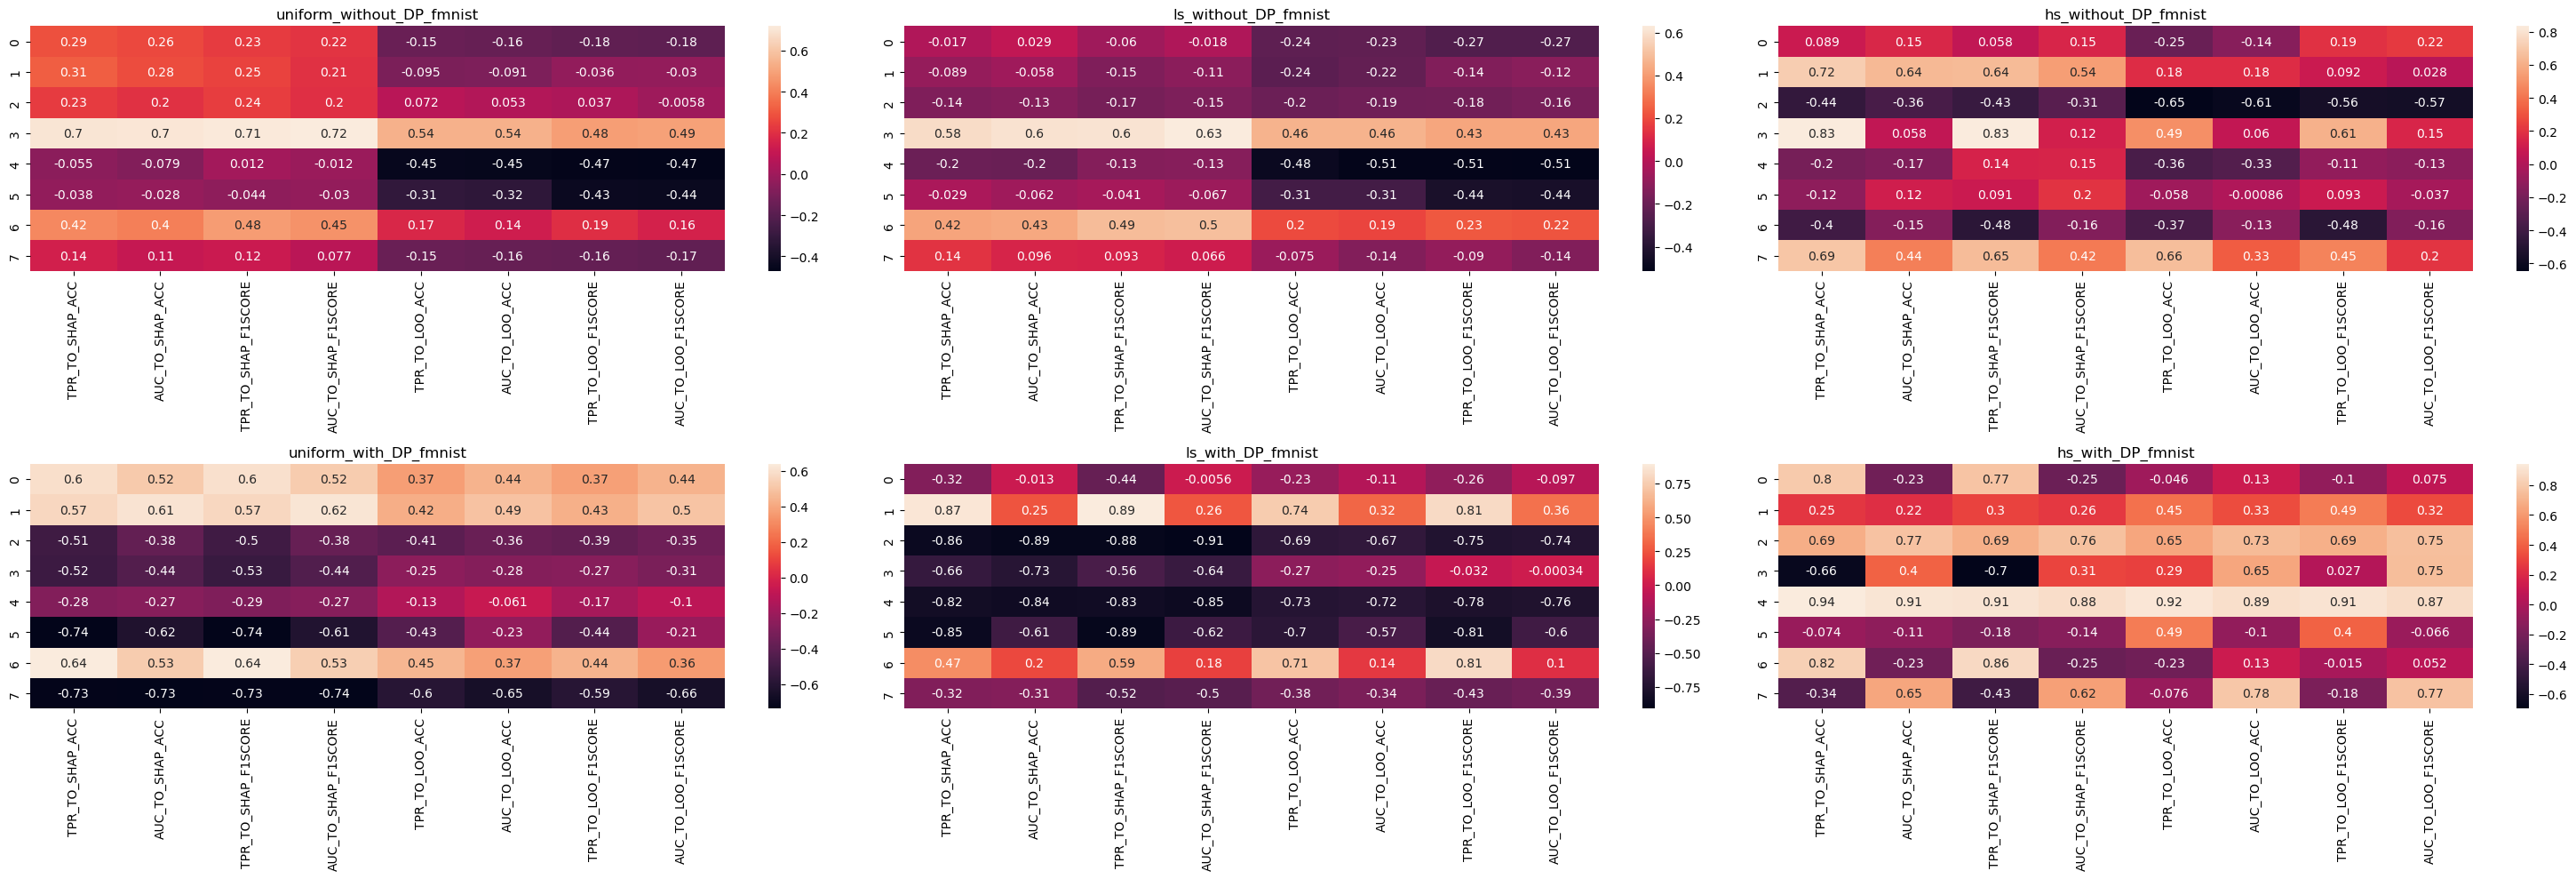

In [ ]:
datasets = ['fmnist']
scenarios = ['uniform', 'ls', 'hs']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 10))

versions = ['without_DP']
results_wo_DP = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)
corr_wo_DP = calculate_multiple_corr(
    results=results_wo_DP,
    no_clients=8,
    mode='spearman'
    )
for (key, item), ax in zip(corr_wo_DP.items(), axes[0,:]):
    sns.heatmap(item, ax=ax, annot=True)
    ax.set_title(key)

versions = ['with_DP']
results_w_DP = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)
corr_w_DP = calculate_multiple_corr(
    results=results_w_DP,
    no_clients=8,
    mode='spearman'
    )
for (key, item), ax in zip(corr_w_DP.items(), axes[1,:]):
    sns.heatmap(item, ax=ax, annot=True)
    ax.set_title(key)
    
fig.tight_layout()

# Experiment I, Method B: CIFAR10

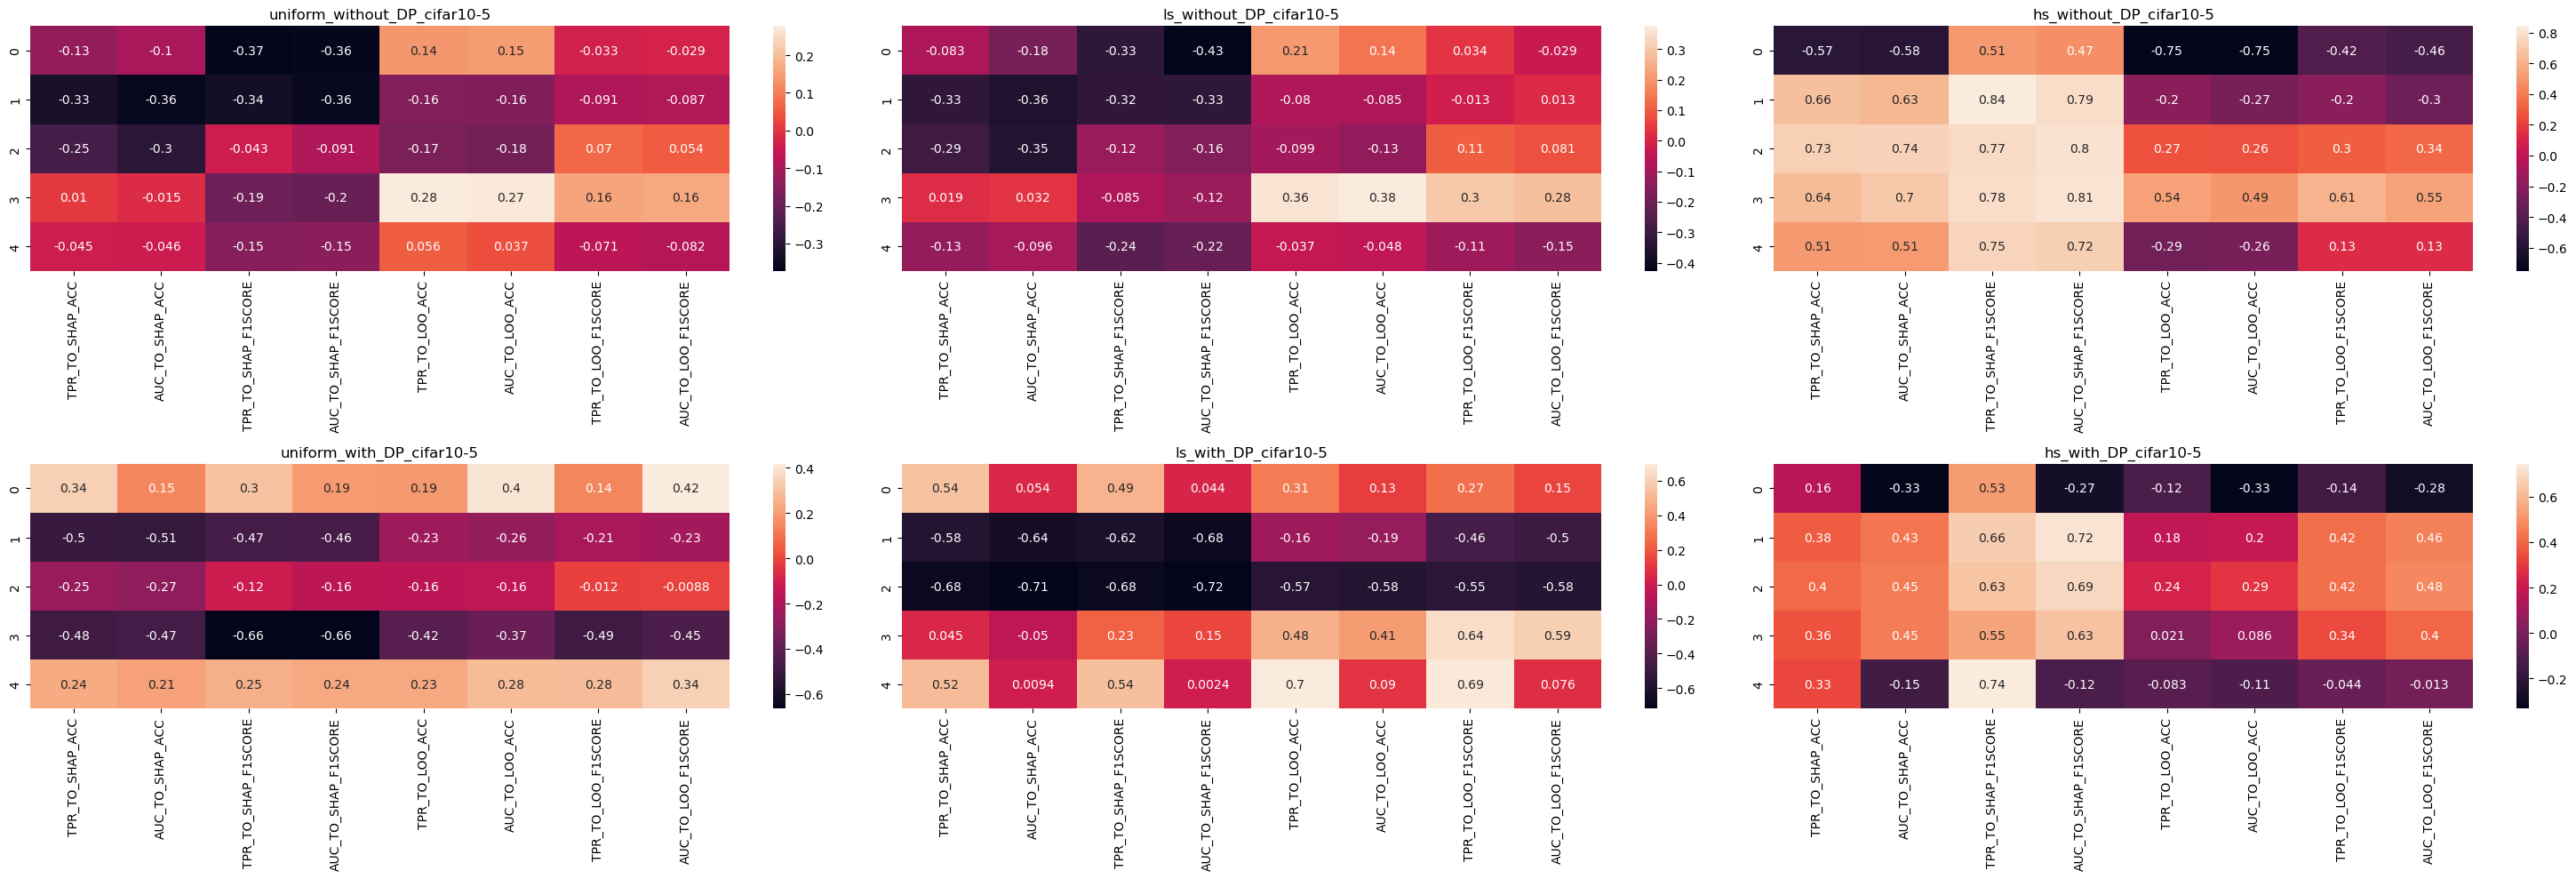

In [ ]:
datasets = ['cifar10-5']
scenarios = ['uniform', 'ls', 'hs']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 10))

versions = ['without_DP']
results_wo_DP = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)
corr_wo_DP = calculate_multiple_corr(
    results=results_wo_DP,
    no_clients=5,
    mode='spearman'
    )
for (key, item), ax in zip(corr_wo_DP.items(), axes[0,:]):
    sns.heatmap(item, ax=ax, annot=True)
    ax.set_title(key)

versions = ['with_DP']
results_w_DP = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)
corr_w_DP = calculate_multiple_corr(
    results=results_w_DP,
    no_clients=5,
    mode='spearman'
    )
for (key, item), ax in zip(corr_w_DP.items(), axes[1,:]):
    sns.heatmap(item, ax=ax, annot=True)
    ax.set_title(key)
    
fig.tight_layout()

# Experiment II
RQ: What is the round-by-round progression of MIA's AUC and/or TPR and Contribution Index for a clients that were tested in two modes: with and without DP.
- MNIST: Clients 0, 1 and 6
- FMNIST: Clients 0, 1 and 6
- CIFAR: Clients 0 and 4
- TissueMNIST: Clients 0 and 4

## MNIST

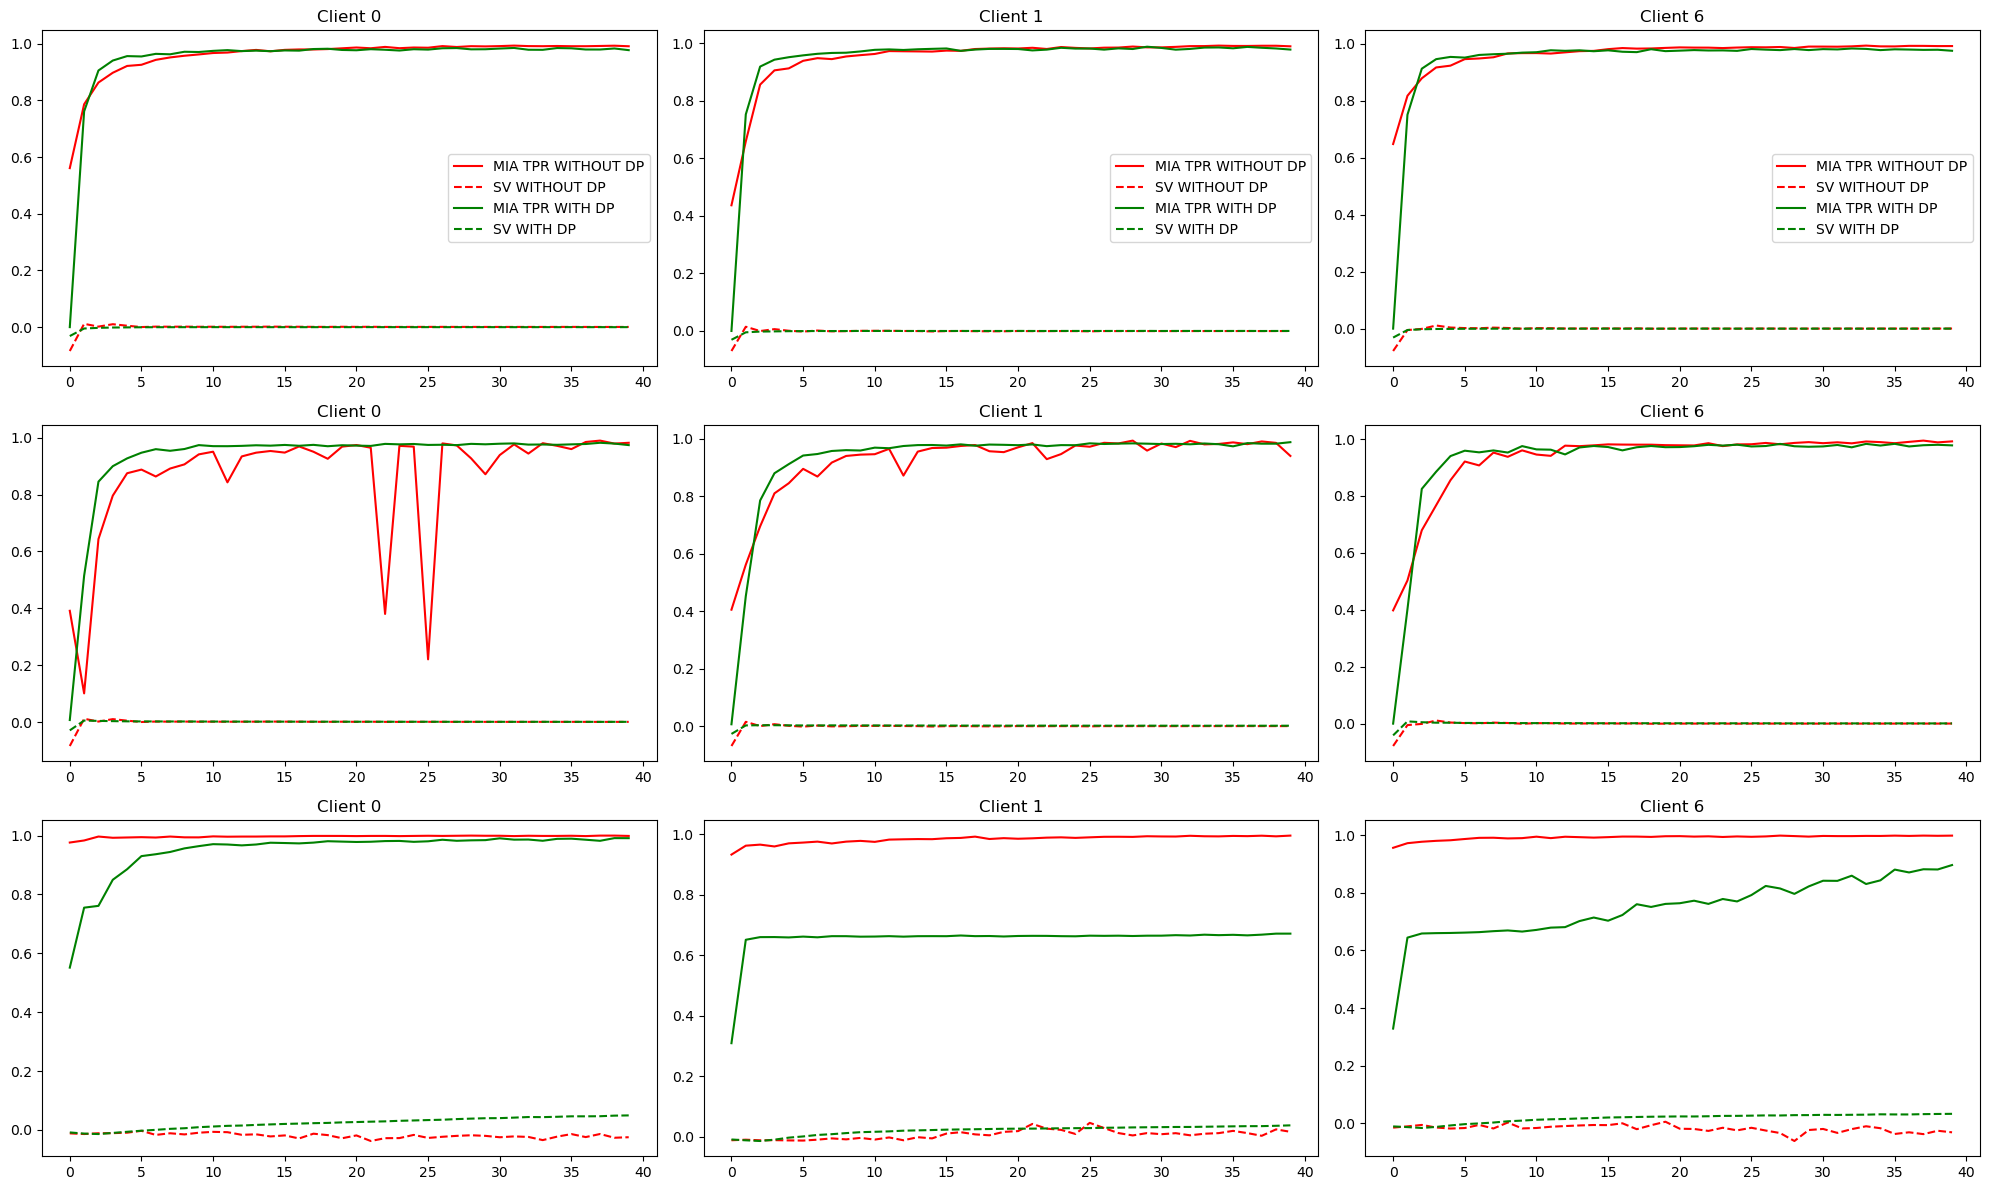

In [ ]:
datasets = ['mnist']
scenarios = ['uniform', 'ls', 'hs']
versions = ['without_DP', 'with_DP']
fig, axes = plt.subplots(3, 3, figsize=(20, 12))

results_MNIST = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)

for client, ax in zip([0, 1, 6], axes[0, :]):
    #data = results_MNIST['uniform_without_DP_mnist'][[f'{client}_TPR', f'{client}_SHAP_ACC']]
    ax.plot(results_MNIST['uniform_without_DP_mnist'][f'{client}_TPR'], 'r-', label='MIA TPR WITHOUT DP')
    ax.plot(results_MNIST['uniform_without_DP_mnist'][f'{client}_SHAP_ACC'], 'r--', label='SV WITHOUT DP')
    ax.plot(results_MNIST['uniform_with_DP_mnist'][f'{client}_TPR'], 'g-', label='MIA TPR WITH DP')
    ax.plot(results_MNIST['uniform_with_DP_mnist'][f'{client}_SHAP_ACC'], 'g--', label='SV WITH DP')
    ax.legend()
    ax.set_title(f"Client {client}")


for client, ax in zip([0, 1, 6], axes[1, :]):
    #data = results_MNIST['uniform_without_DP_mnist'][[f'{client}_TPR', f'{client}_SHAP_ACC']]
    ax.plot(results_MNIST['ls_without_DP_mnist'][f'{client}_TPR'], 'r-', label='MIA TPR WITHOUT DP')
    ax.plot(results_MNIST['ls_without_DP_mnist'][f'{client}_SHAP_ACC'], 'r--', label='SV WITHOUT DP')
    ax.plot(results_MNIST['ls_with_DP_mnist'][f'{client}_TPR'], 'g-', label='MIA TPR WITH DP')
    ax.plot(results_MNIST['ls_with_DP_mnist'][f'{client}_SHAP_ACC'], 'g--', label='SV WITH DP')
    ax.set_title(f"Client {client}")


for client, ax in zip([0, 1, 6], axes[2, :]):
    #data = results_MNIST['uniform_without_DP_mnist'][[f'{client}_TPR', f'{client}_SHAP_ACC']]
    ax.plot(results_MNIST['hs_without_DP_mnist'][f'{client}_TPR'], 'r-', label='MIA TPR WITHOUT DP')
    ax.plot(results_MNIST['hs_without_DP_mnist'][f'{client}_SHAP_ACC'], 'r--', label='SV WITHOUT DP')
    ax.plot(results_MNIST['hs_with_DP_mnist'][f'{client}_TPR'], 'g-', label='MIA TPR WITH DP')
    ax.plot(results_MNIST['hs_with_DP_mnist'][f'{client}_SHAP_ACC'], 'g--', label='SV WITH DP')
    ax.set_title(f"Client {client}")

fig.tight_layout()

## FMNIST

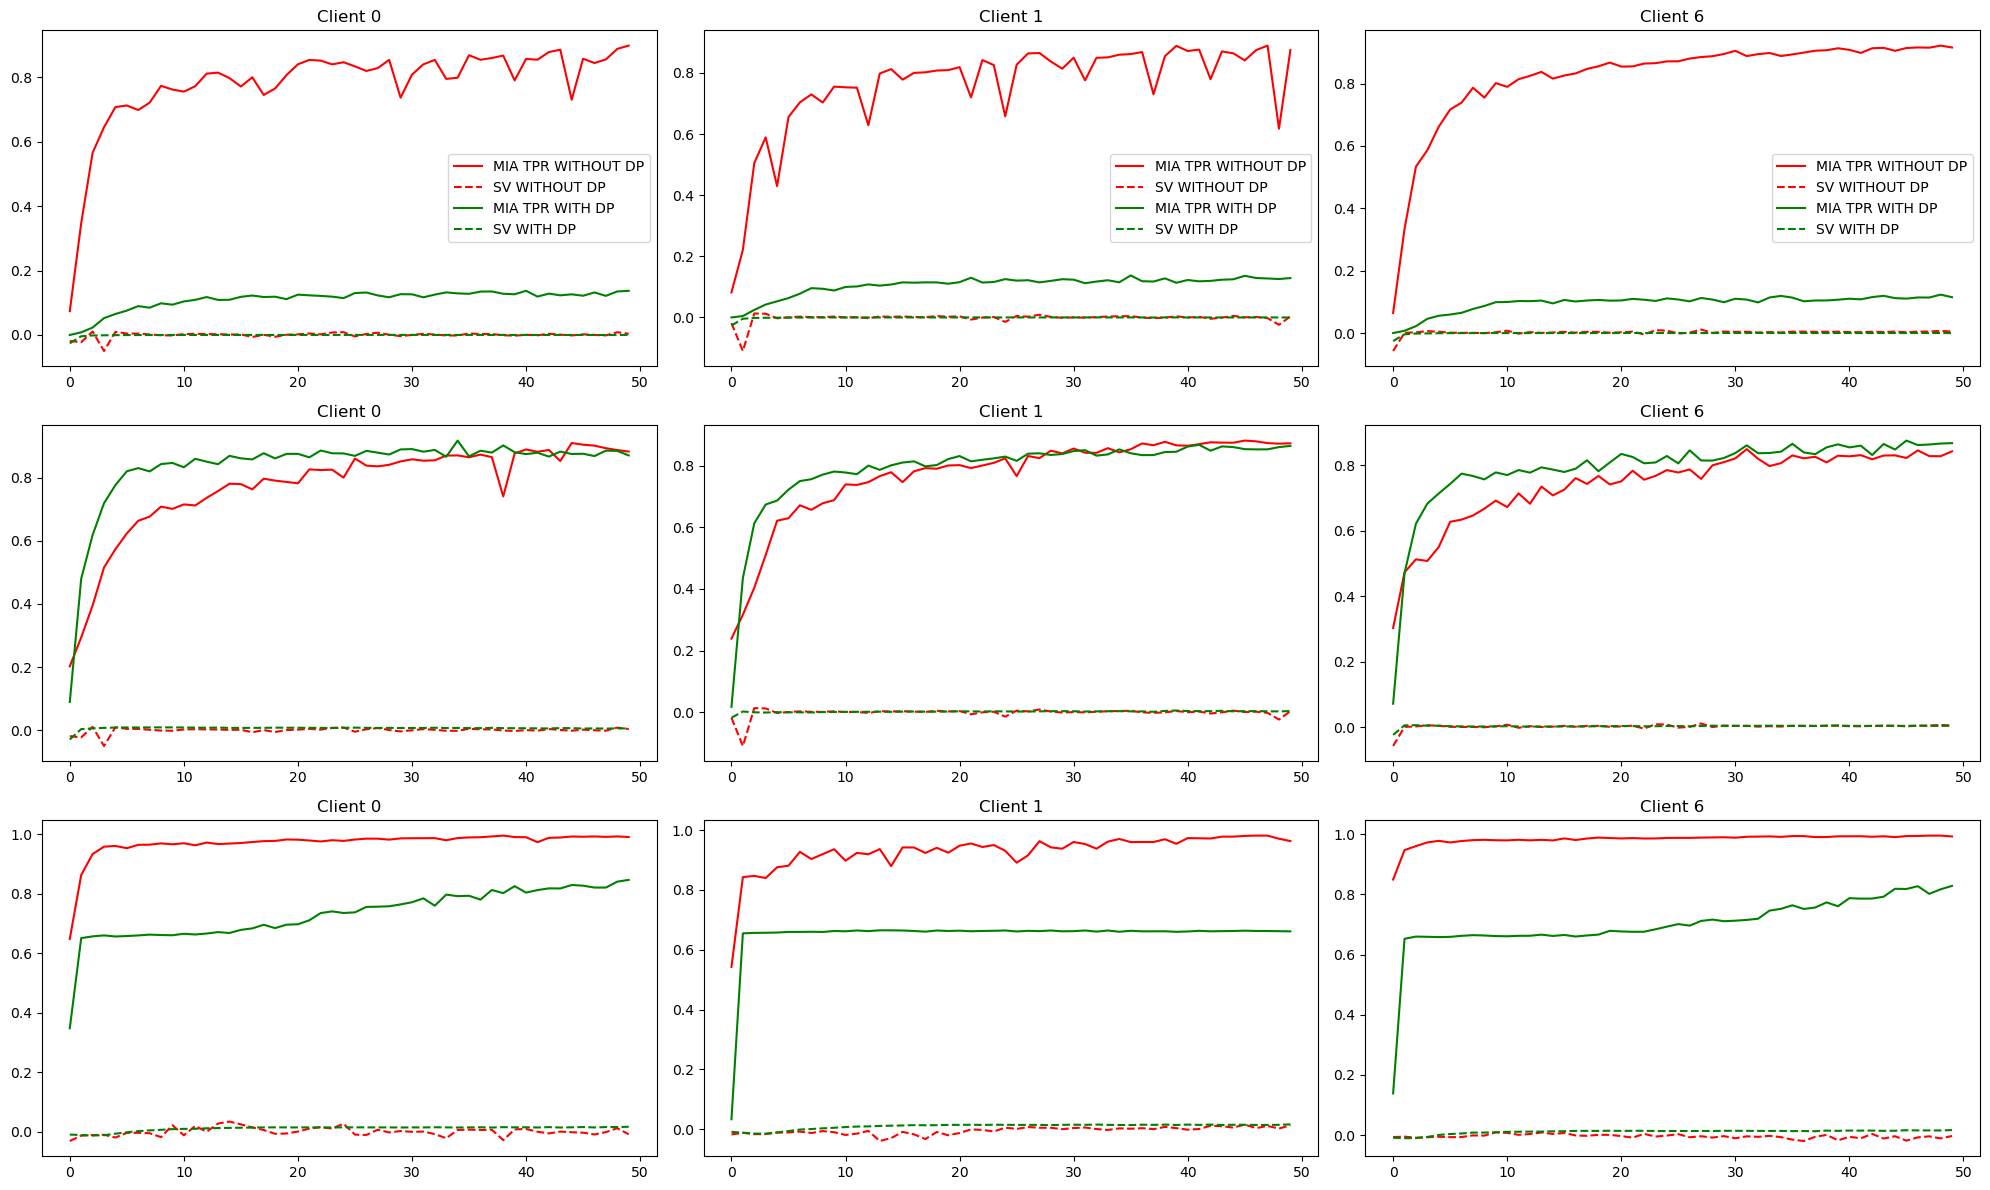

In [ ]:
datasets = ['fmnist']
scenarios = ['uniform', 'ls', 'hs']
versions = ['without_DP', 'with_DP']
fig, axes = plt.subplots(3, 3, figsize=(20, 12))

results_MNIST = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)

for client, ax in zip([0, 1, 6], axes[0, :]):
    #data = results_MNIST['uniform_without_DP_mnist'][[f'{client}_TPR', f'{client}_SHAP_ACC']]
    ax.plot(results_MNIST['uniform_without_DP_fmnist'][f'{client}_TPR'], 'r-', label='MIA TPR WITHOUT DP')
    ax.plot(results_MNIST['uniform_without_DP_fmnist'][f'{client}_SHAP_ACC'], 'r--', label='SV WITHOUT DP')
    ax.plot(results_MNIST['uniform_with_DP_fmnist'][f'{client}_TPR'], 'g-', label='MIA TPR WITH DP')
    ax.plot(results_MNIST['uniform_with_DP_fmnist'][f'{client}_SHAP_ACC'], 'g--', label='SV WITH DP')
    ax.legend()
    ax.set_title(f"Client {client}")


for client, ax in zip([0, 1, 6], axes[1, :]):
    #data = results_MNIST['uniform_without_DP_mnist'][[f'{client}_TPR', f'{client}_SHAP_ACC']]
    ax.plot(results_MNIST['ls_without_DP_fmnist'][f'{client}_TPR'], 'r-', label='MIA TPR WITHOUT DP')
    ax.plot(results_MNIST['ls_without_DP_fmnist'][f'{client}_SHAP_ACC'], 'r--', label='SV WITHOUT DP')
    ax.plot(results_MNIST['ls_with_DP_fmnist'][f'{client}_TPR'], 'g-', label='MIA TPR WITH DP')
    ax.plot(results_MNIST['ls_with_DP_fmnist'][f'{client}_SHAP_ACC'], 'g--', label='SV WITH DP')
    ax.set_title(f"Client {client}")


for client, ax in zip([0, 1, 6], axes[2, :]):
    #data = results_MNIST['uniform_without_DP_mnist'][[f'{client}_TPR', f'{client}_SHAP_ACC']]
    ax.plot(results_MNIST['hs_without_DP_fmnist'][f'{client}_TPR'], 'r-', label='MIA TPR WITHOUT DP')
    ax.plot(results_MNIST['hs_without_DP_fmnist'][f'{client}_SHAP_ACC'], 'r--', label='SV WITHOUT DP')
    ax.plot(results_MNIST['hs_with_DP_fmnist'][f'{client}_TPR'], 'g-', label='MIA TPR WITH DP')
    ax.plot(results_MNIST['hs_with_DP_fmnist'][f'{client}_SHAP_ACC'], 'g--', label='SV WITH DP')
    ax.set_title(f"Client {client}")

fig.tight_layout()

## CIFAR10

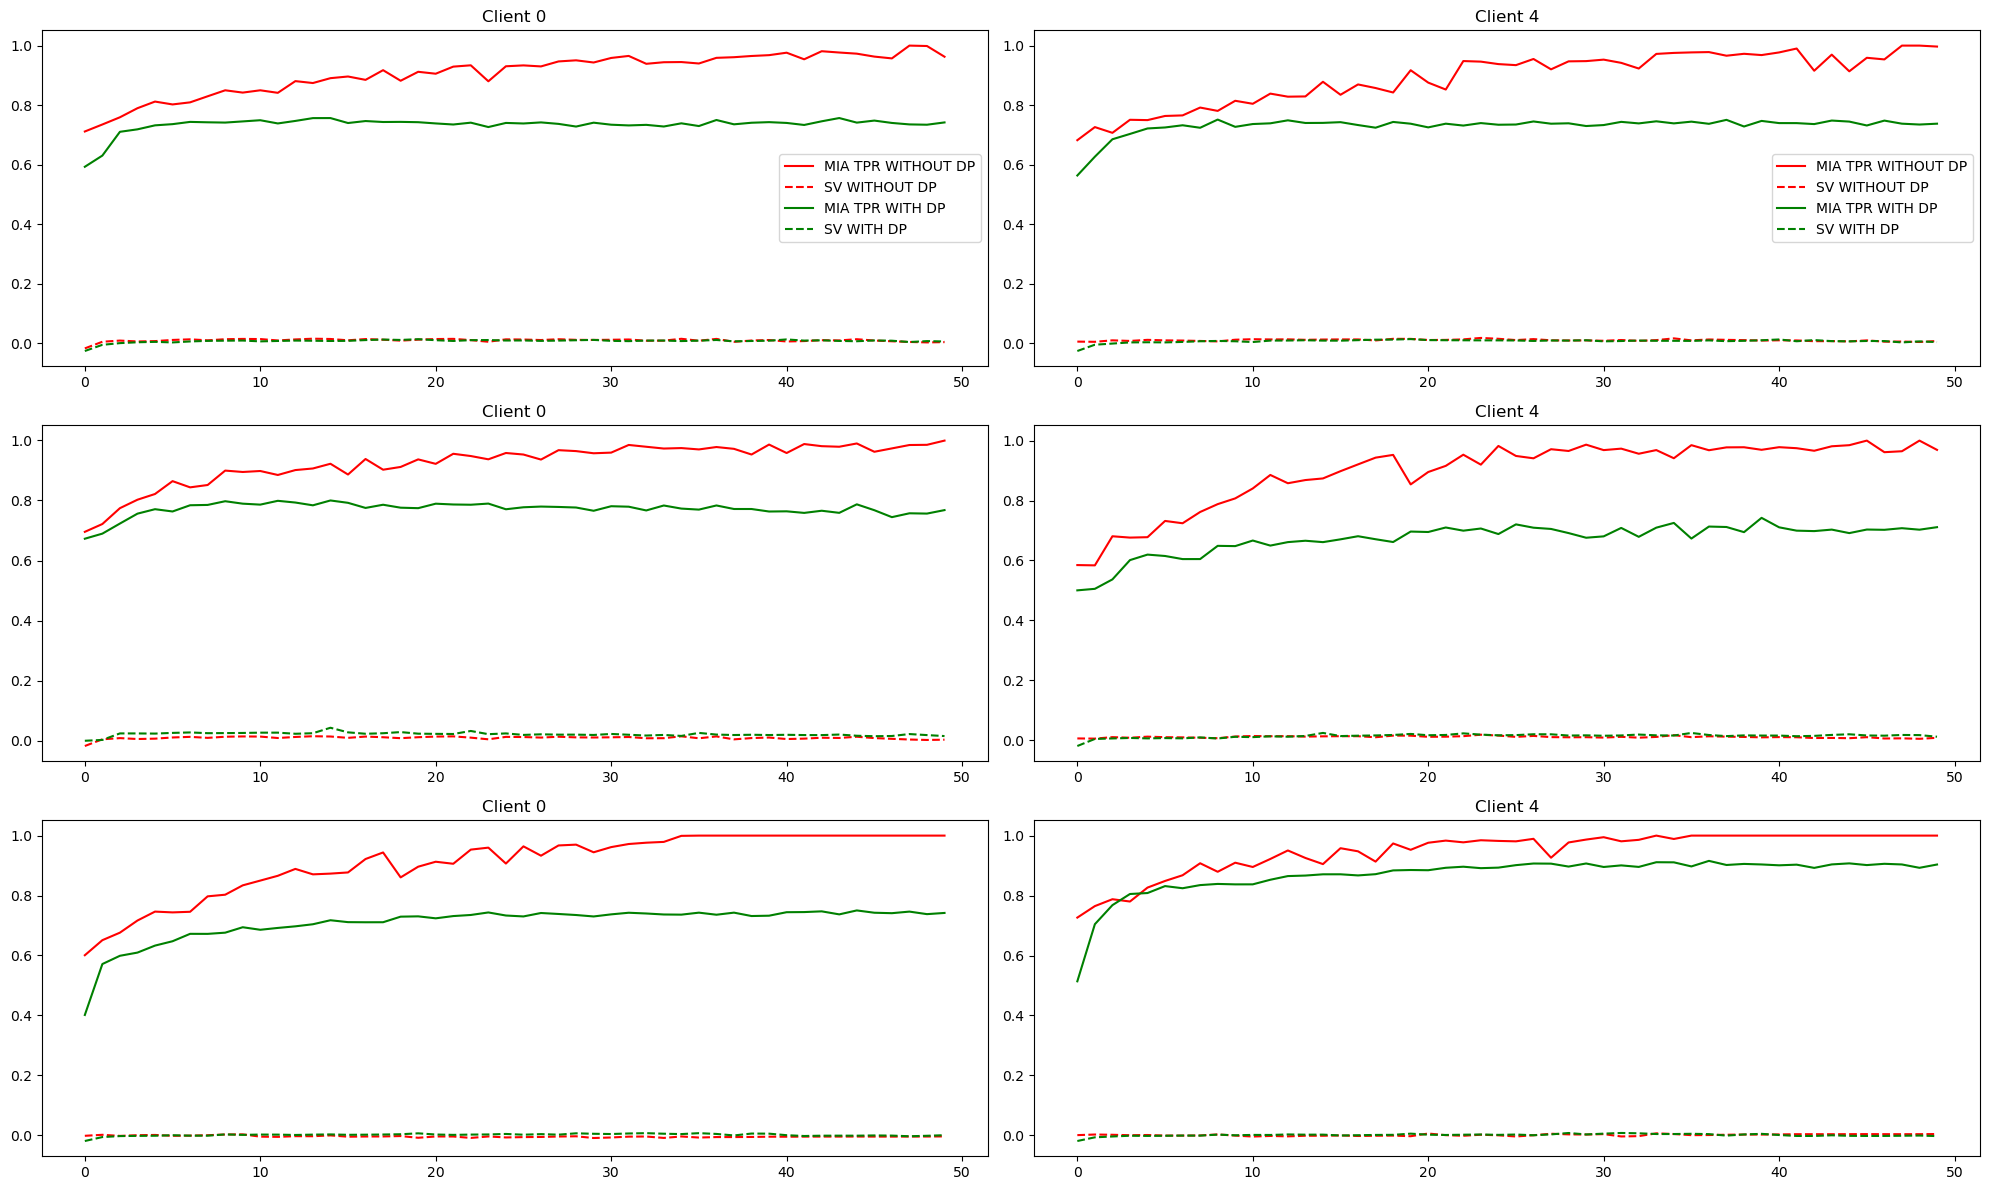

In [ ]:
datasets = ['cifar10-5']
scenarios = ['uniform', 'ls', 'hs']
versions = ['without_DP', 'with_DP']
fig, axes = plt.subplots(3, 2, figsize=(20, 12))

results_MNIST = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)

for client, ax in zip([0, 4], axes[0, :]):
    #data = results_MNIST['uniform_without_DP_mnist'][[f'{client}_TPR', f'{client}_SHAP_ACC']]
    ax.plot(results_MNIST['uniform_without_DP_cifar10-5'][f'{client}_TPR'], 'r-', label='MIA TPR WITHOUT DP')
    ax.plot(results_MNIST['uniform_without_DP_cifar10-5'][f'{client}_SHAP_ACC'], 'r--', label='SV WITHOUT DP')
    ax.plot(results_MNIST['uniform_with_DP_cifar10-5'][f'{client}_TPR'], 'g-', label='MIA TPR WITH DP')
    ax.plot(results_MNIST['uniform_with_DP_cifar10-5'][f'{client}_SHAP_ACC'], 'g--', label='SV WITH DP')
    ax.legend()
    ax.set_title(f"Client {client}")


for client, ax in zip([0, 4], axes[1, :]):
    #data = results_MNIST['uniform_without_DP_mnist'][[f'{client}_TPR', f'{client}_SHAP_ACC']]
    ax.plot(results_MNIST['ls_without_DP_cifar10-5'][f'{client}_TPR'], 'r-', label='MIA TPR WITHOUT DP')
    ax.plot(results_MNIST['ls_without_DP_cifar10-5'][f'{client}_SHAP_ACC'], 'r--', label='SV WITHOUT DP')
    ax.plot(results_MNIST['ls_with_DP_cifar10-5'][f'{client}_TPR'], 'g-', label='MIA TPR WITH DP')
    ax.plot(results_MNIST['ls_with_DP_cifar10-5'][f'{client}_SHAP_ACC'], 'g--', label='SV WITH DP')
    ax.set_title(f"Client {client}")


for client, ax in zip([0, 4], axes[2, :]):
    #data = results_MNIST['uniform_without_DP_mnist'][[f'{client}_TPR', f'{client}_SHAP_ACC']]
    ax.plot(results_MNIST['hs_without_DP_cifar10-5'][f'{client}_TPR'], 'r-', label='MIA TPR WITHOUT DP')
    ax.plot(results_MNIST['hs_without_DP_cifar10-5'][f'{client}_SHAP_ACC'], 'r--', label='SV WITHOUT DP')
    ax.plot(results_MNIST['hs_with_DP_cifar10-5'][f'{client}_TPR'], 'g-', label='MIA TPR WITH DP')
    ax.plot(results_MNIST['hs_with_DP_cifar10-5'][f'{client}_SHAP_ACC'], 'g--', label='SV WITH DP')
    ax.set_title(f"Client {client}")

fig.tight_layout()

# RQ3: What are the p-values for correlation between particular time-series?

## Method A: Pearson

### Experiment III, Method A: MNIST

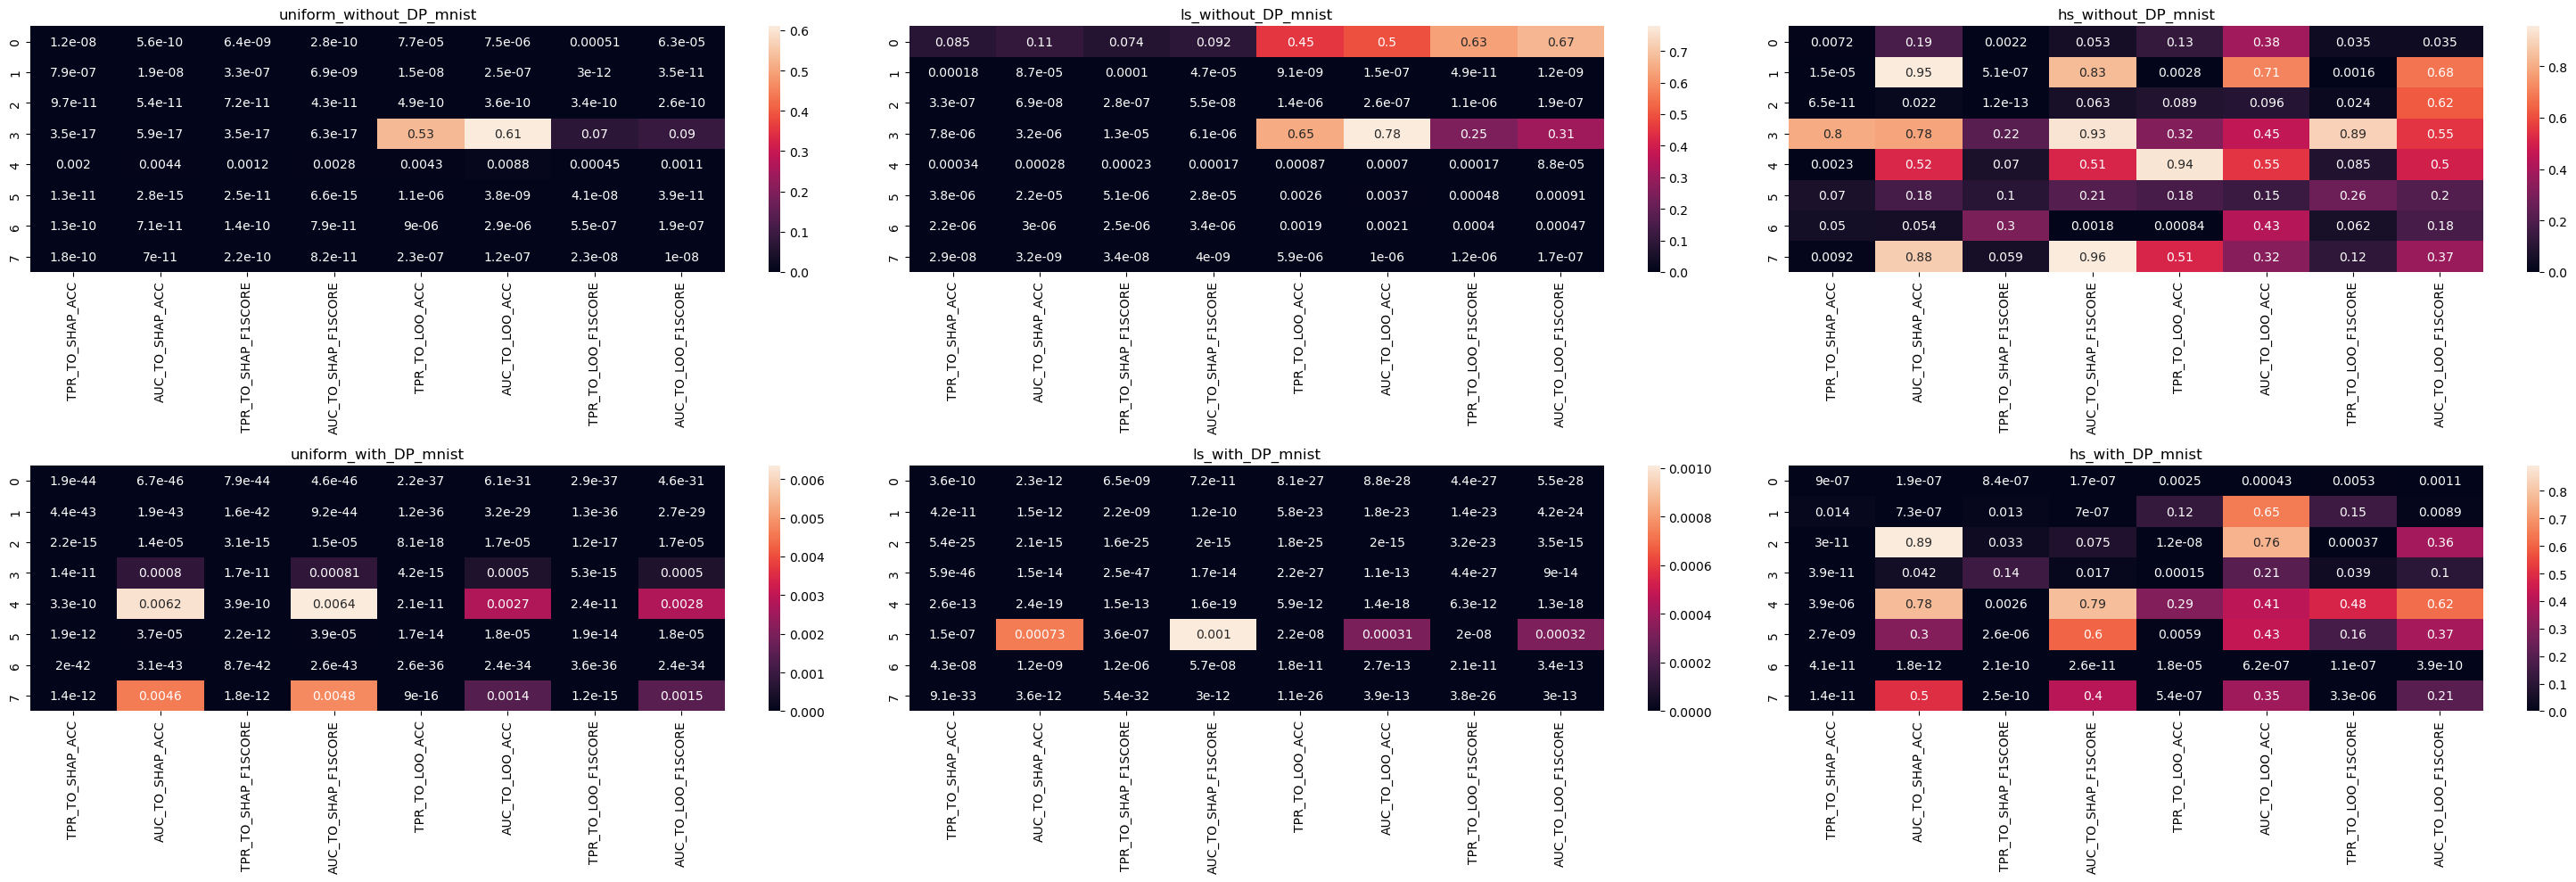

In [206]:
datasets = ['mnist']
scenarios = ['uniform', 'ls', 'hs']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 10))

versions = ['without_DP']
results_wo_DP = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)
corr_wo_DP = calculate_multiple_pvalues(
    results=results_wo_DP,
    no_clients=8,
    mode='pearson'
    )
for (key, item), ax in zip(corr_wo_DP.items(), axes[0,:]):
    sns.heatmap(item, ax=ax, annot=True)
    ax.set_title(key)

versions = ['with_DP']
results_w_DP = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)
corr_w_DP = calculate_multiple_pvalues(
    results=results_w_DP,
    no_clients=8,
    mode='pearson'
    )
for (key, item), ax in zip(corr_w_DP.items(), axes[1,:]):
    sns.heatmap(item, ax=ax, annot=True)
    ax.set_title(key)
    
fig.tight_layout()

### Experiment III, Method A: FMNIST

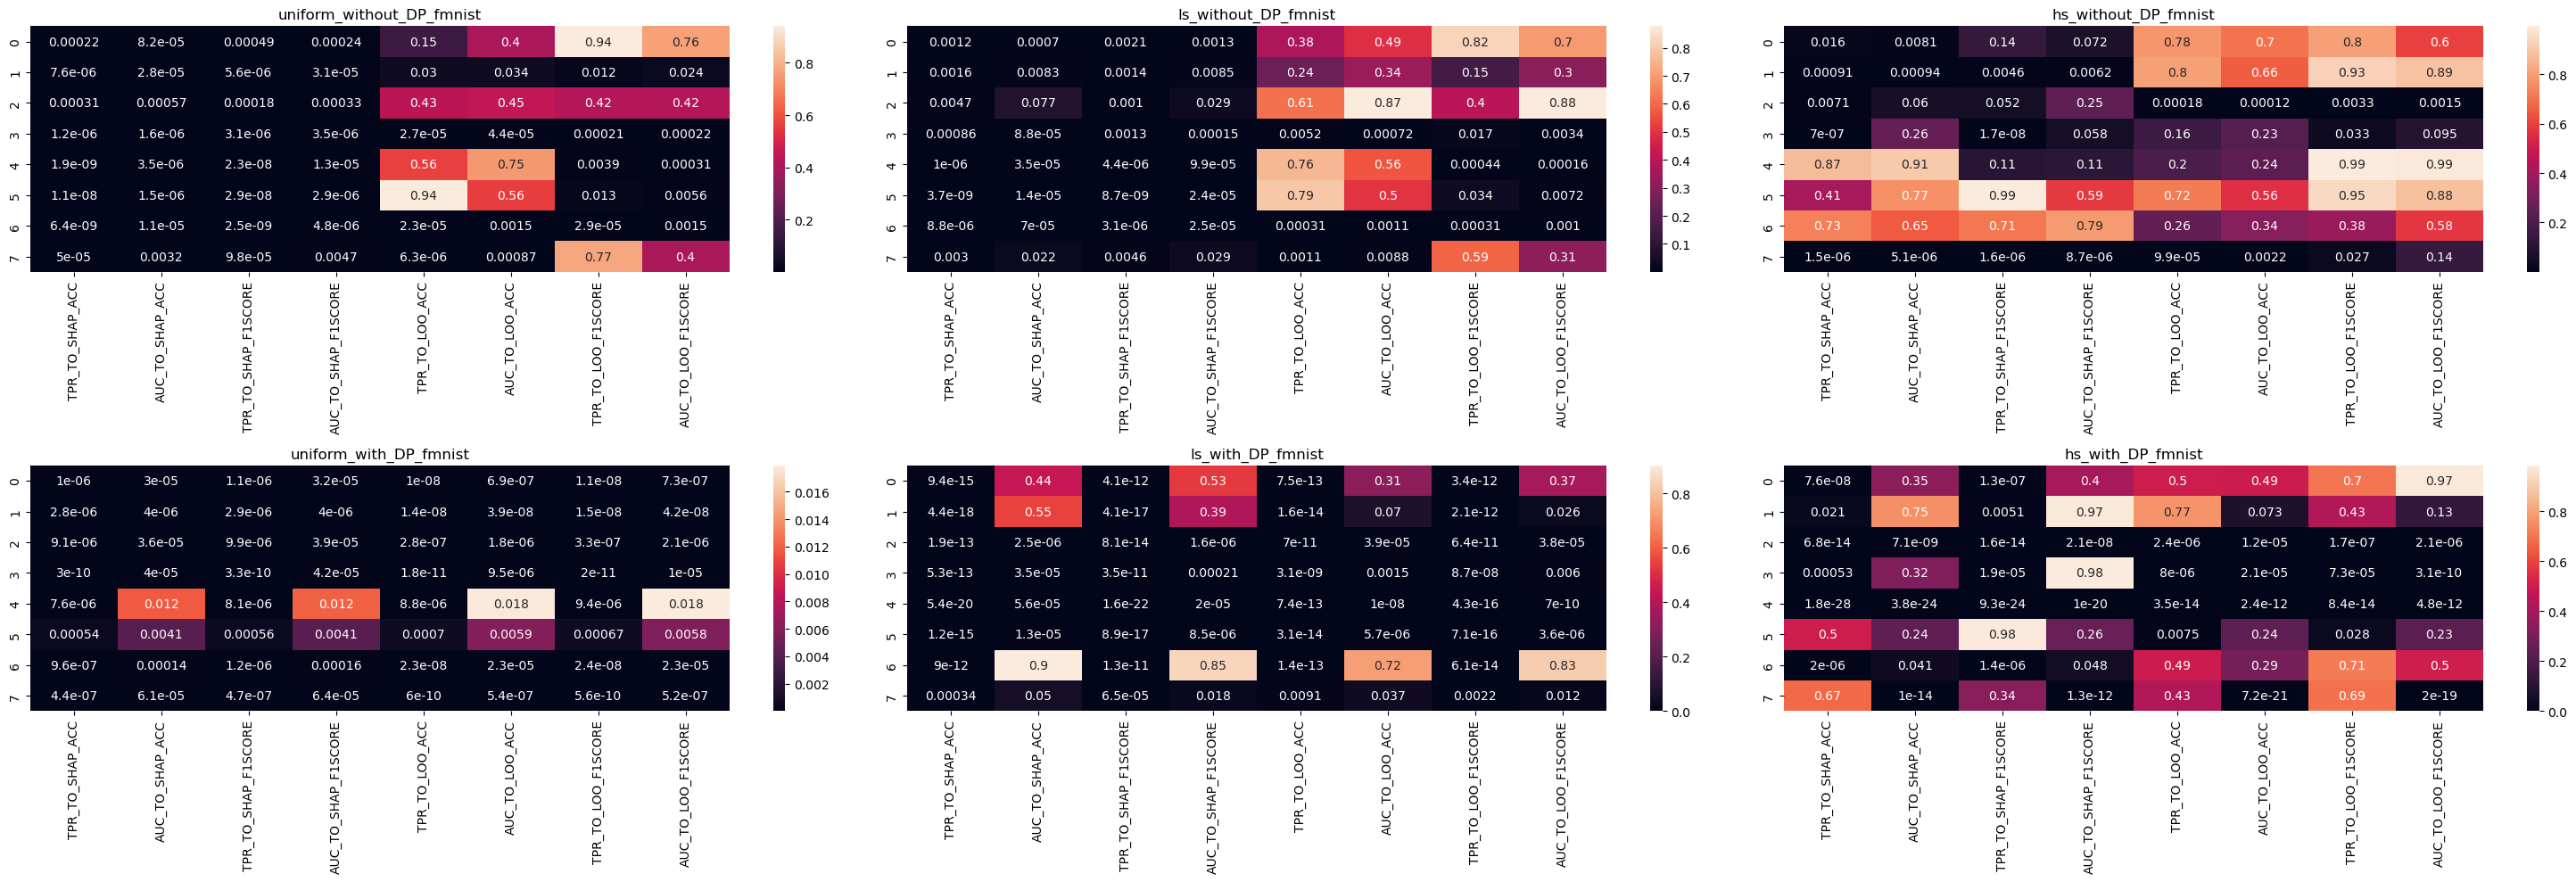

In [207]:
datasets = ['fmnist']
scenarios = ['uniform', 'ls', 'hs']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 10))

versions = ['without_DP']
results_wo_DP = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)
corr_wo_DP = calculate_multiple_pvalues(
    results=results_wo_DP,
    no_clients=8,
    mode='pearson'
    )
for (key, item), ax in zip(corr_wo_DP.items(), axes[0,:]):
    sns.heatmap(item, ax=ax, annot=True)
    ax.set_title(key)

versions = ['with_DP']
results_w_DP = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)
corr_w_DP = calculate_multiple_pvalues(
    results=results_w_DP,
    no_clients=8,
    mode='pearson'
    )
for (key, item), ax in zip(corr_w_DP.items(), axes[1,:]):
    sns.heatmap(item, ax=ax, annot=True)
    ax.set_title(key)
    
fig.tight_layout()

### Experiment III, Method A: CIFAR10

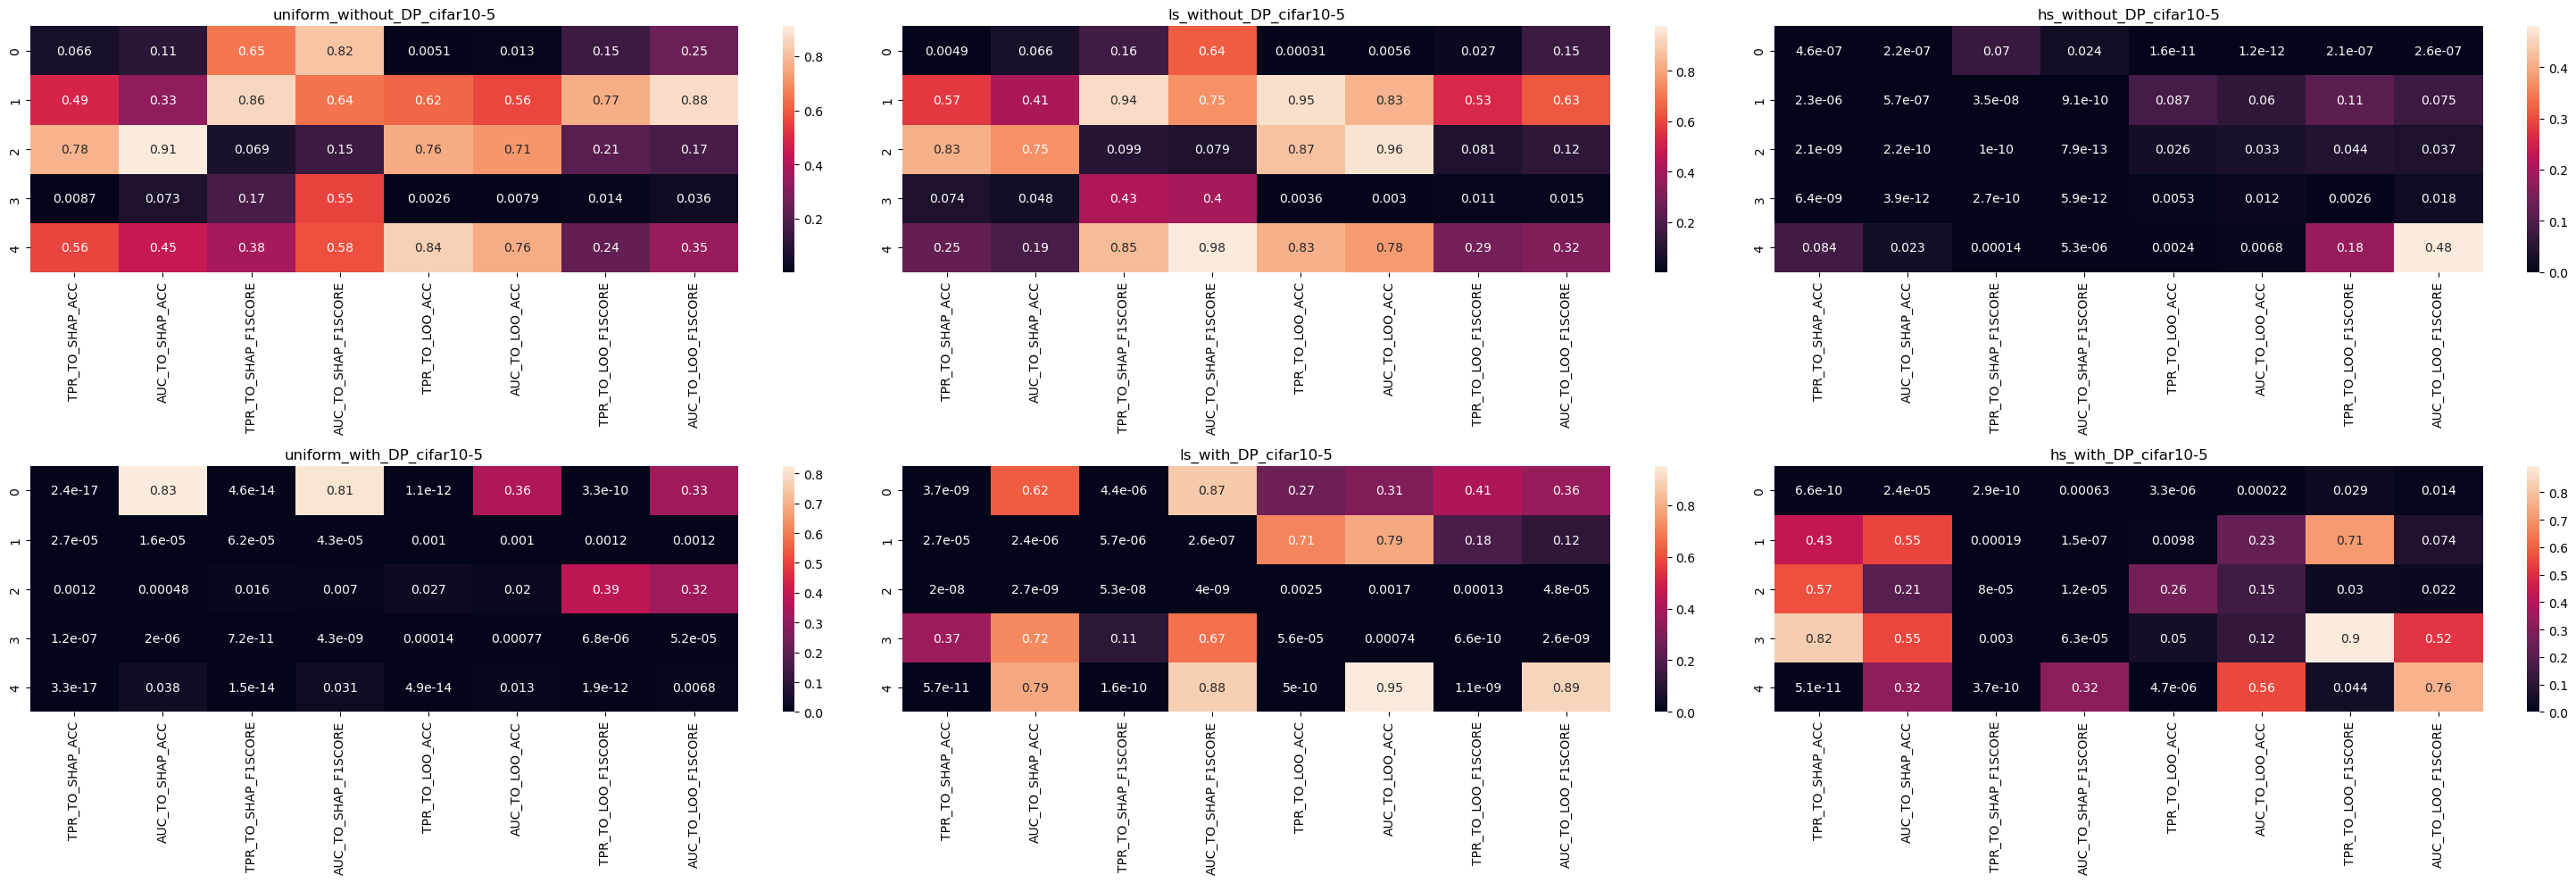

In [209]:
datasets = ['cifar10-5']
scenarios = ['uniform', 'ls', 'hs']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 10))

versions = ['without_DP']
results_wo_DP = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)
corr_wo_DP = calculate_multiple_pvalues(
    results=results_wo_DP,
    no_clients=5,
    mode='pearson'
    )
for (key, item), ax in zip(corr_wo_DP.items(), axes[0,:]):
    sns.heatmap(item, ax=ax, annot=True)
    ax.set_title(key)

versions = ['with_DP']
results_w_DP = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)
corr_w_DP = calculate_multiple_pvalues(
    results=results_w_DP,
    no_clients=5,
    mode='pearson'
    )
for (key, item), ax in zip(corr_w_DP.items(), axes[1,:]):
    sns.heatmap(item, ax=ax, annot=True)
    ax.set_title(key)
    
fig.tight_layout()

## Method B: Spearman

### Experiment III, Method B: MNIST

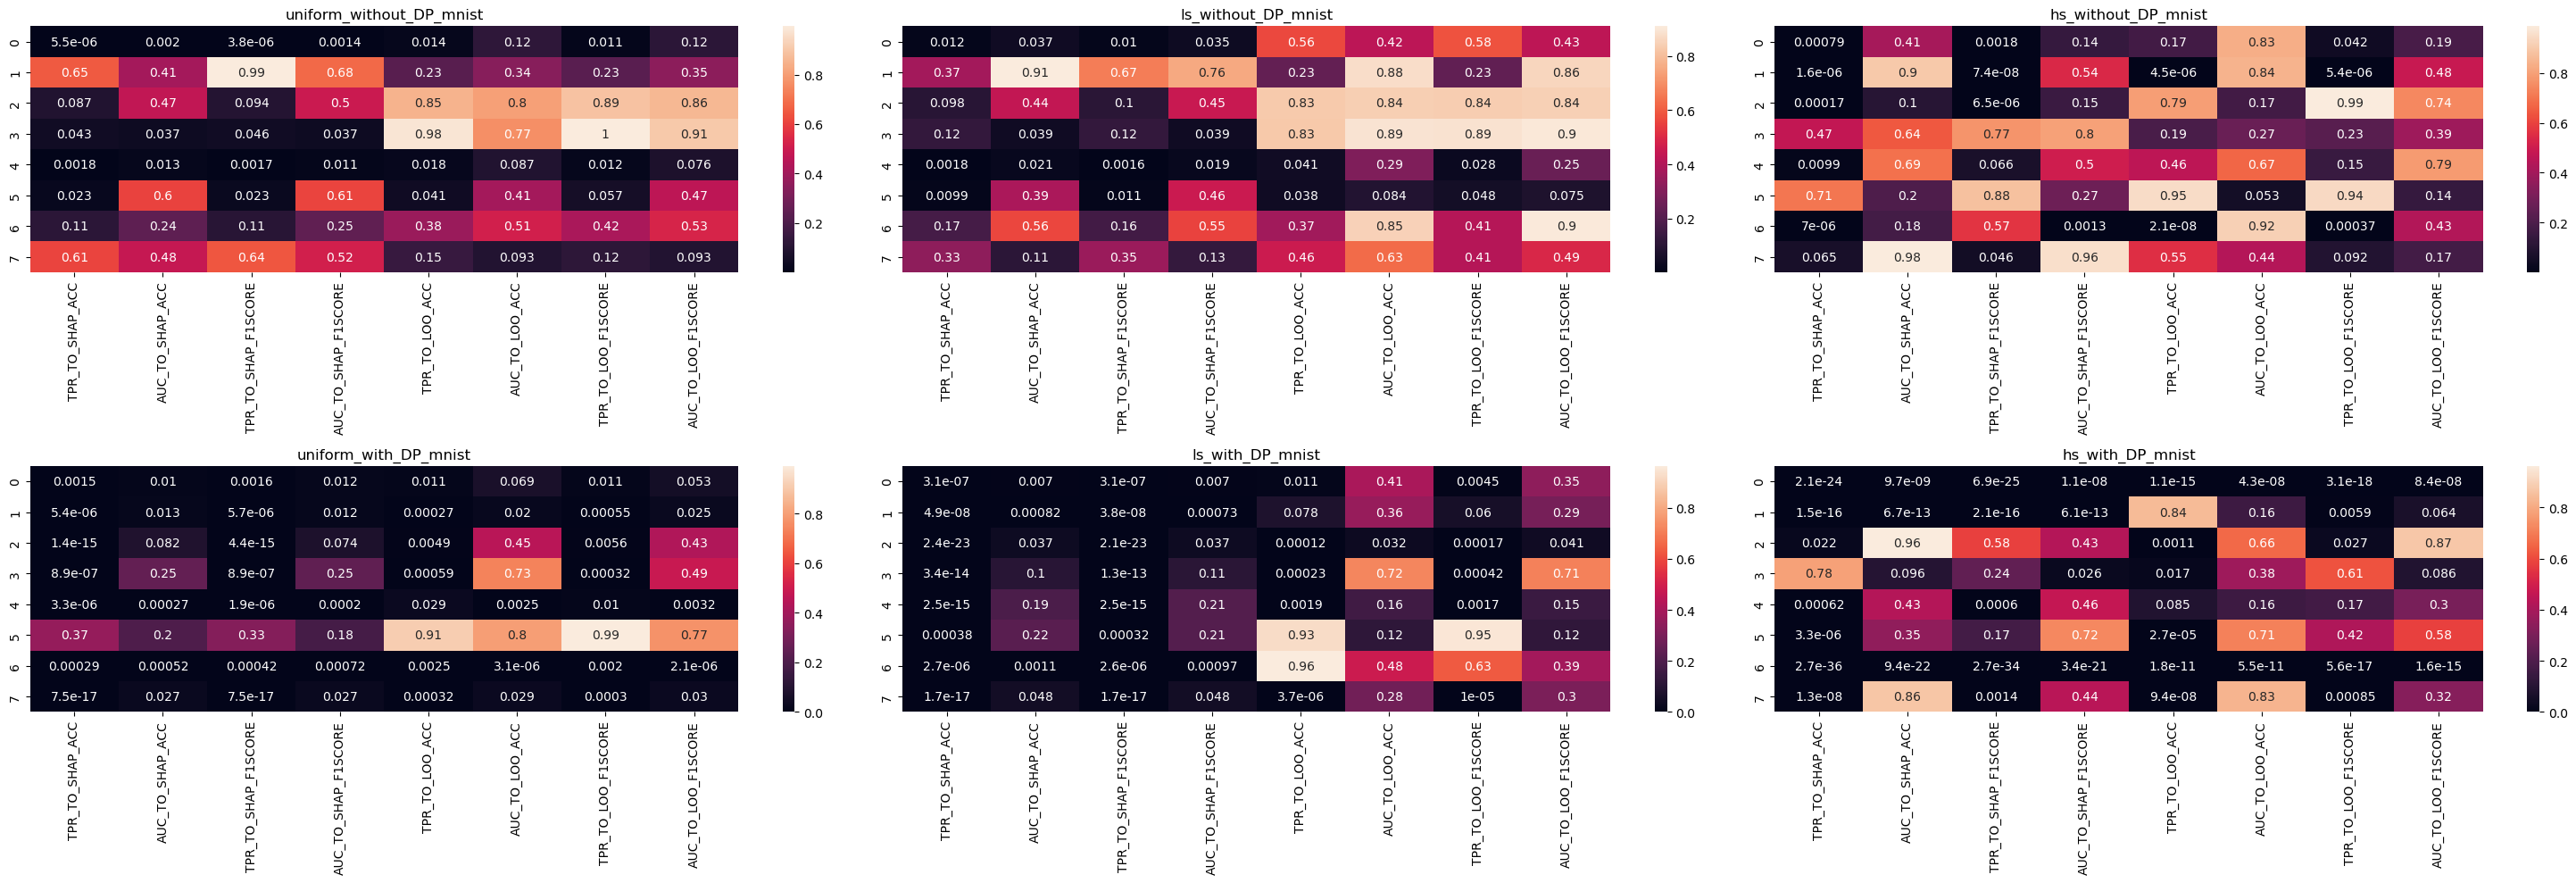

In [210]:
datasets = ['mnist']
scenarios = ['uniform', 'ls', 'hs']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 10))

versions = ['without_DP']
results_wo_DP = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)
corr_wo_DP = calculate_multiple_pvalues(
    results=results_wo_DP,
    no_clients=8,
    mode='spearman'
    )
for (key, item), ax in zip(corr_wo_DP.items(), axes[0,:]):
    sns.heatmap(item, ax=ax, annot=True)
    ax.set_title(key)

versions = ['with_DP']
results_w_DP = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)
corr_w_DP = calculate_multiple_pvalues(
    results=results_w_DP,
    no_clients=8,
    mode='spearman'
    )
for (key, item), ax in zip(corr_w_DP.items(), axes[1,:]):
    sns.heatmap(item, ax=ax, annot=True)
    ax.set_title(key)
    
fig.tight_layout()

### Experiment III, Method B: FMNIST

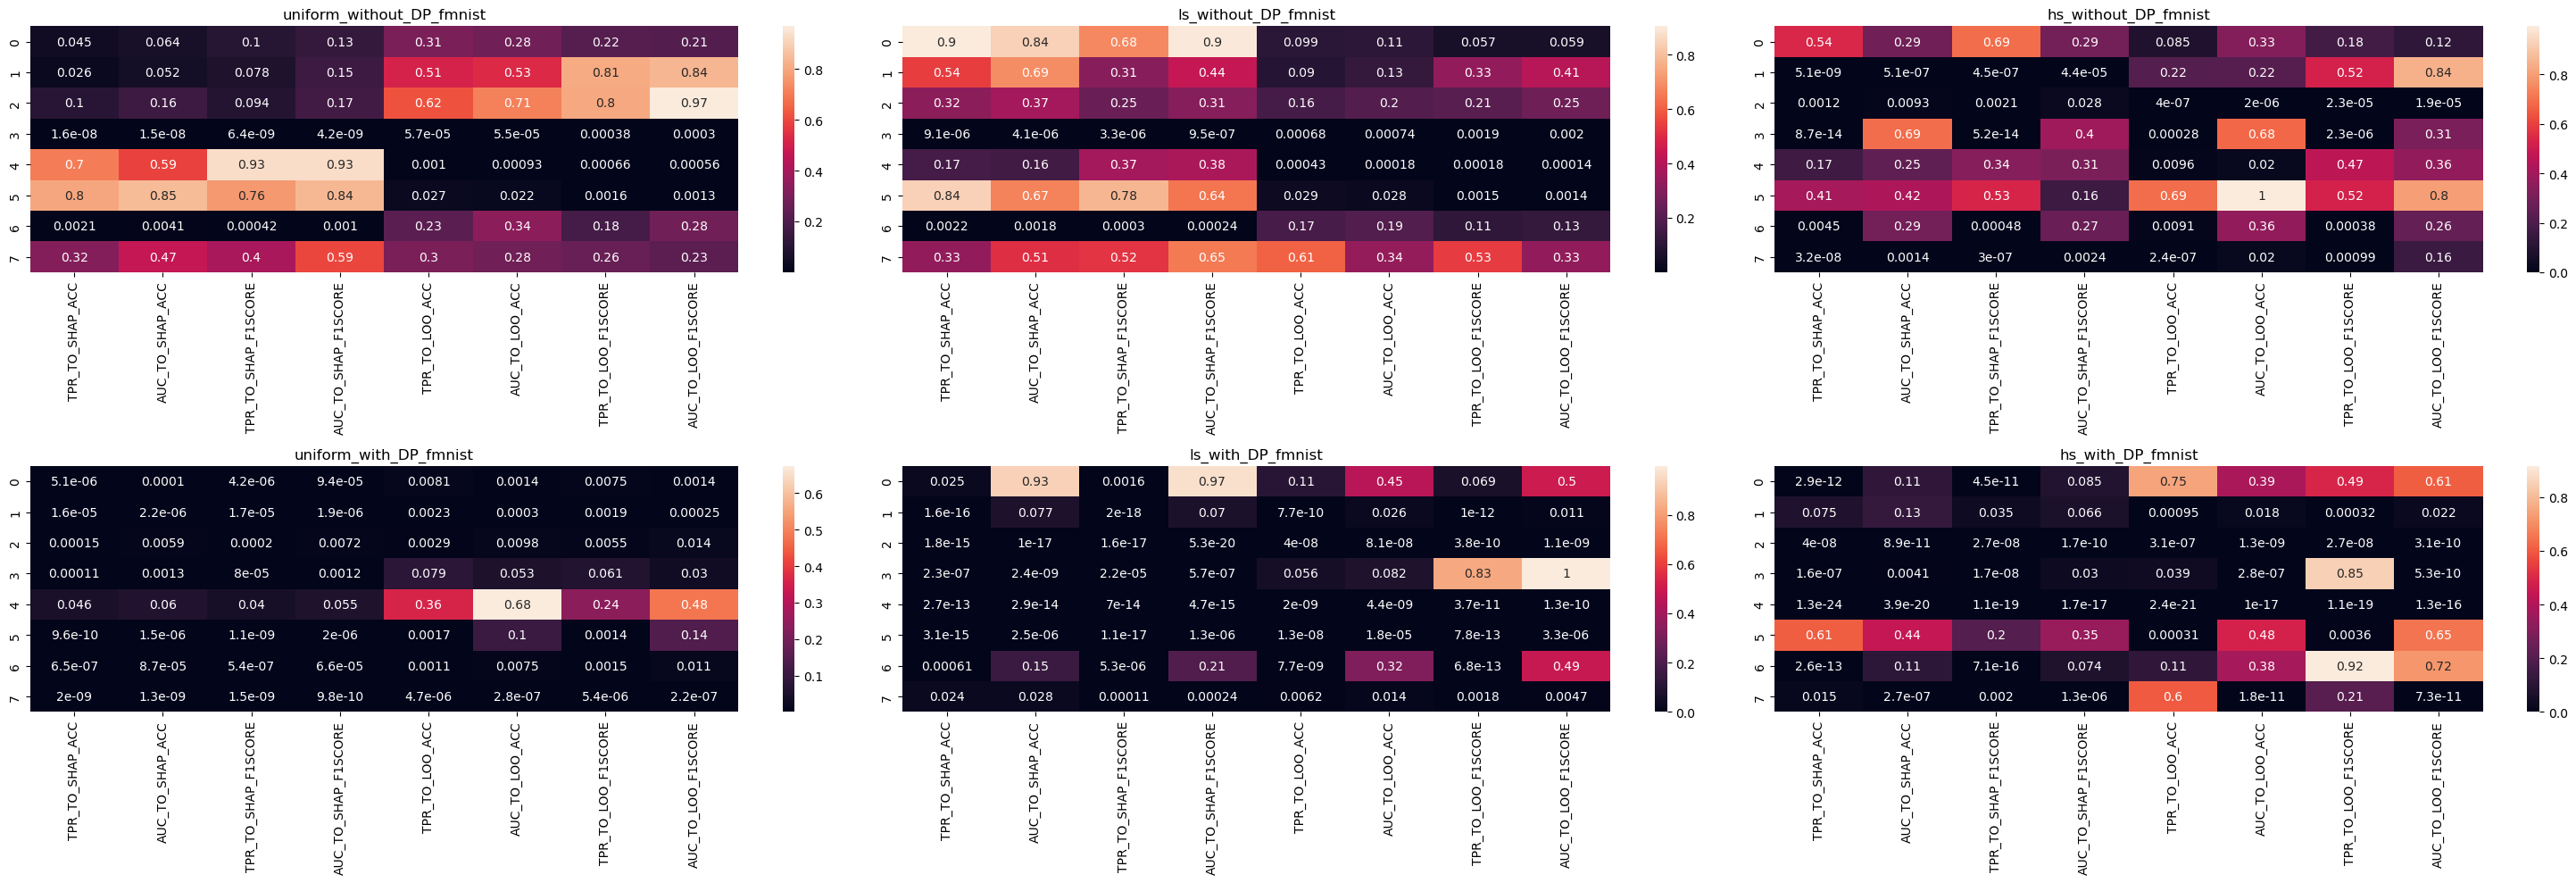

In [211]:
datasets = ['fmnist']
scenarios = ['uniform', 'ls', 'hs']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 10))

versions = ['without_DP']
results_wo_DP = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)
corr_wo_DP = calculate_multiple_pvalues(
    results=results_wo_DP,
    no_clients=8,
    mode='spearman'
    )
for (key, item), ax in zip(corr_wo_DP.items(), axes[0,:]):
    sns.heatmap(item, ax=ax, annot=True)
    ax.set_title(key)

versions = ['with_DP']
results_w_DP = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)
corr_w_DP = calculate_multiple_pvalues(
    results=results_w_DP,
    no_clients=8,
    mode='spearman'
    )
for (key, item), ax in zip(corr_w_DP.items(), axes[1,:]):
    sns.heatmap(item, ax=ax, annot=True)
    ax.set_title(key)
    
fig.tight_layout()

### Experiment III, Method B: CIFAR10

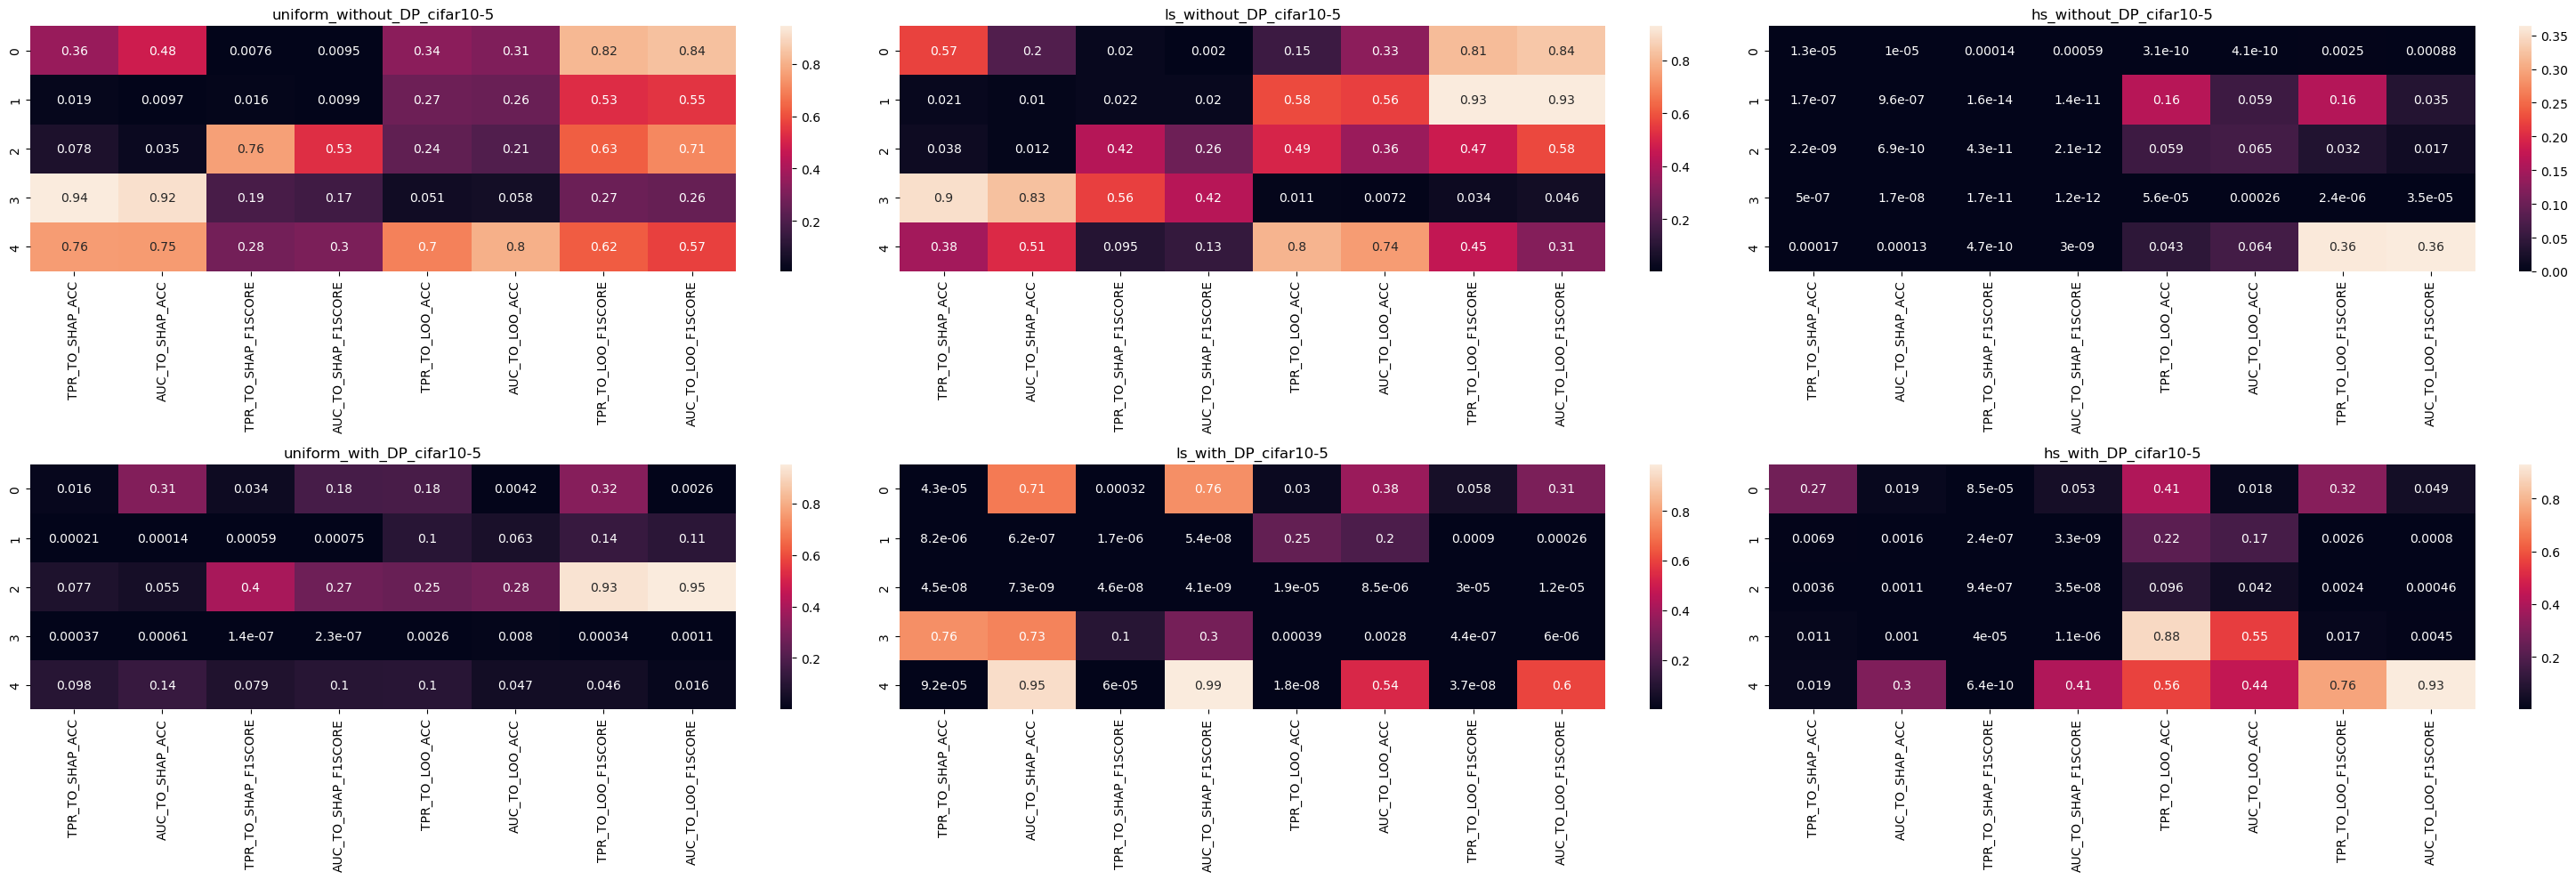

In [213]:
datasets = ['cifar10-5']
scenarios = ['uniform', 'ls', 'hs']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 10))

versions = ['without_DP']
results_wo_DP = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)
corr_wo_DP = calculate_multiple_pvalues(
    results=results_wo_DP,
    no_clients=5,
    mode='spearman'
    )
for (key, item), ax in zip(corr_wo_DP.items(), axes[0,:]):
    sns.heatmap(item, ax=ax, annot=True)
    ax.set_title(key)

versions = ['with_DP']
results_w_DP = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)
corr_w_DP = calculate_multiple_pvalues(
    results=results_w_DP,
    no_clients=5,
    mode='spearman'
    )
for (key, item), ax in zip(corr_w_DP.items(), axes[1,:]):
    sns.heatmap(item, ax=ax, annot=True)
    ax.set_title(key)
    
fig.tight_layout()

# Formal Hypotheses Formulation
## H1: There is no clear correlation between value of the contribution index (SV) and the success rate of MIA measured by a True Positive Rate when none of the clients employ DP-meachnism.
## H2: There is a clear correlation between value of the contribution index (SV) and the success rate of MIA measured by a True Positive Rate when some of the clients employ DP-mechanism.

## MNIST

### Pearson

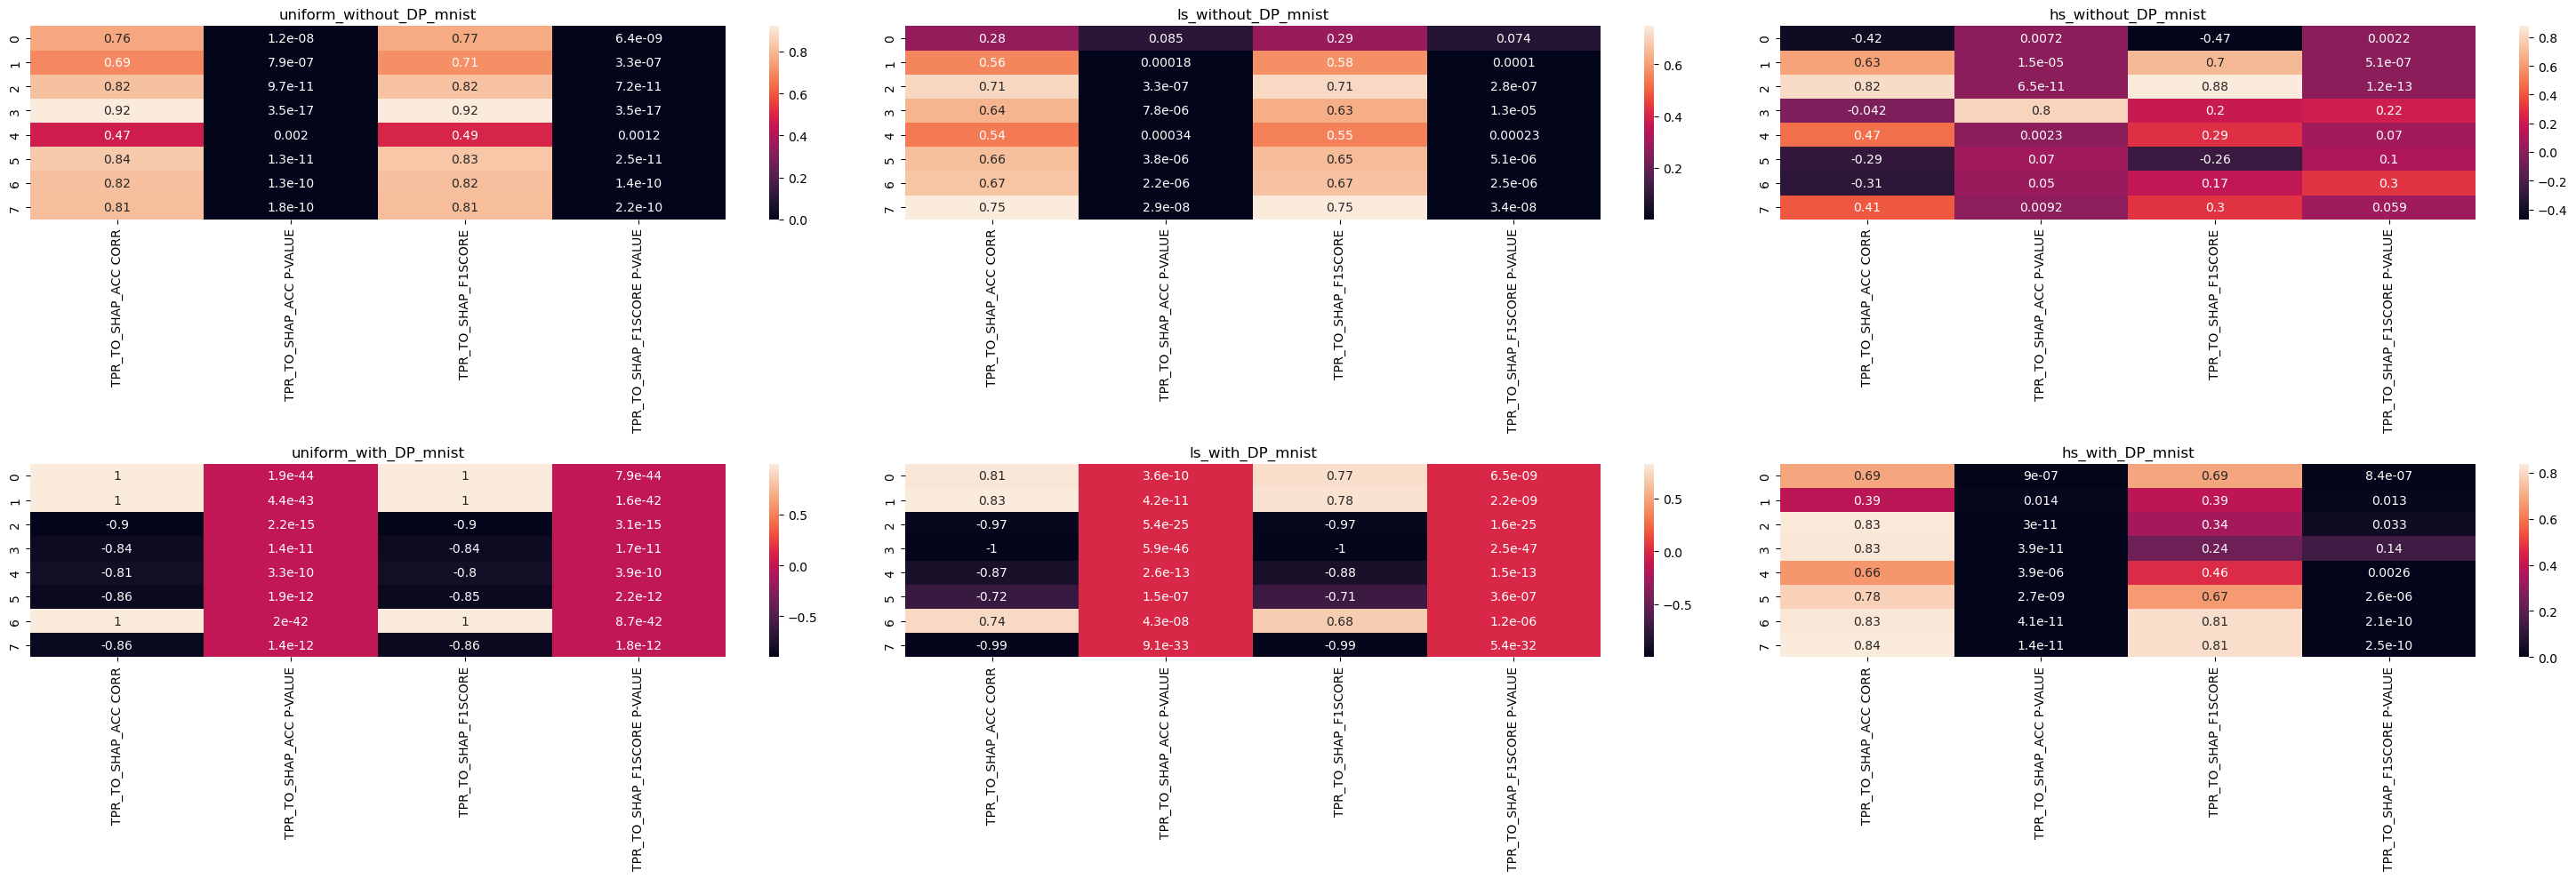

In [24]:
datasets = ['mnist']
scenarios = ['uniform', 'ls', 'hs']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 10))

versions = ['without_DP']
results_wo_DP = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)
corr_wo_DP = calculate_multiple_corr_short(
    results=results_wo_DP,
    no_clients=8,
    mode='pearson'
    )
for (key, item), ax in zip(corr_wo_DP.items(), axes[0,:]):
    sns.heatmap(item, ax=ax, annot=True)
    ax.set_title(key)

versions = ['with_DP']
results_w_DP = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)
corr_w_DP = calculate_multiple_corr_short(
    results=results_w_DP,
    no_clients=8,
    mode='pearson'
    )
for (key, item), ax in zip(corr_w_DP.items(), axes[1,:]):
    sns.heatmap(item, ax=ax, annot=True)
    ax.set_title(key)
    
fig.tight_layout()

### Spearman

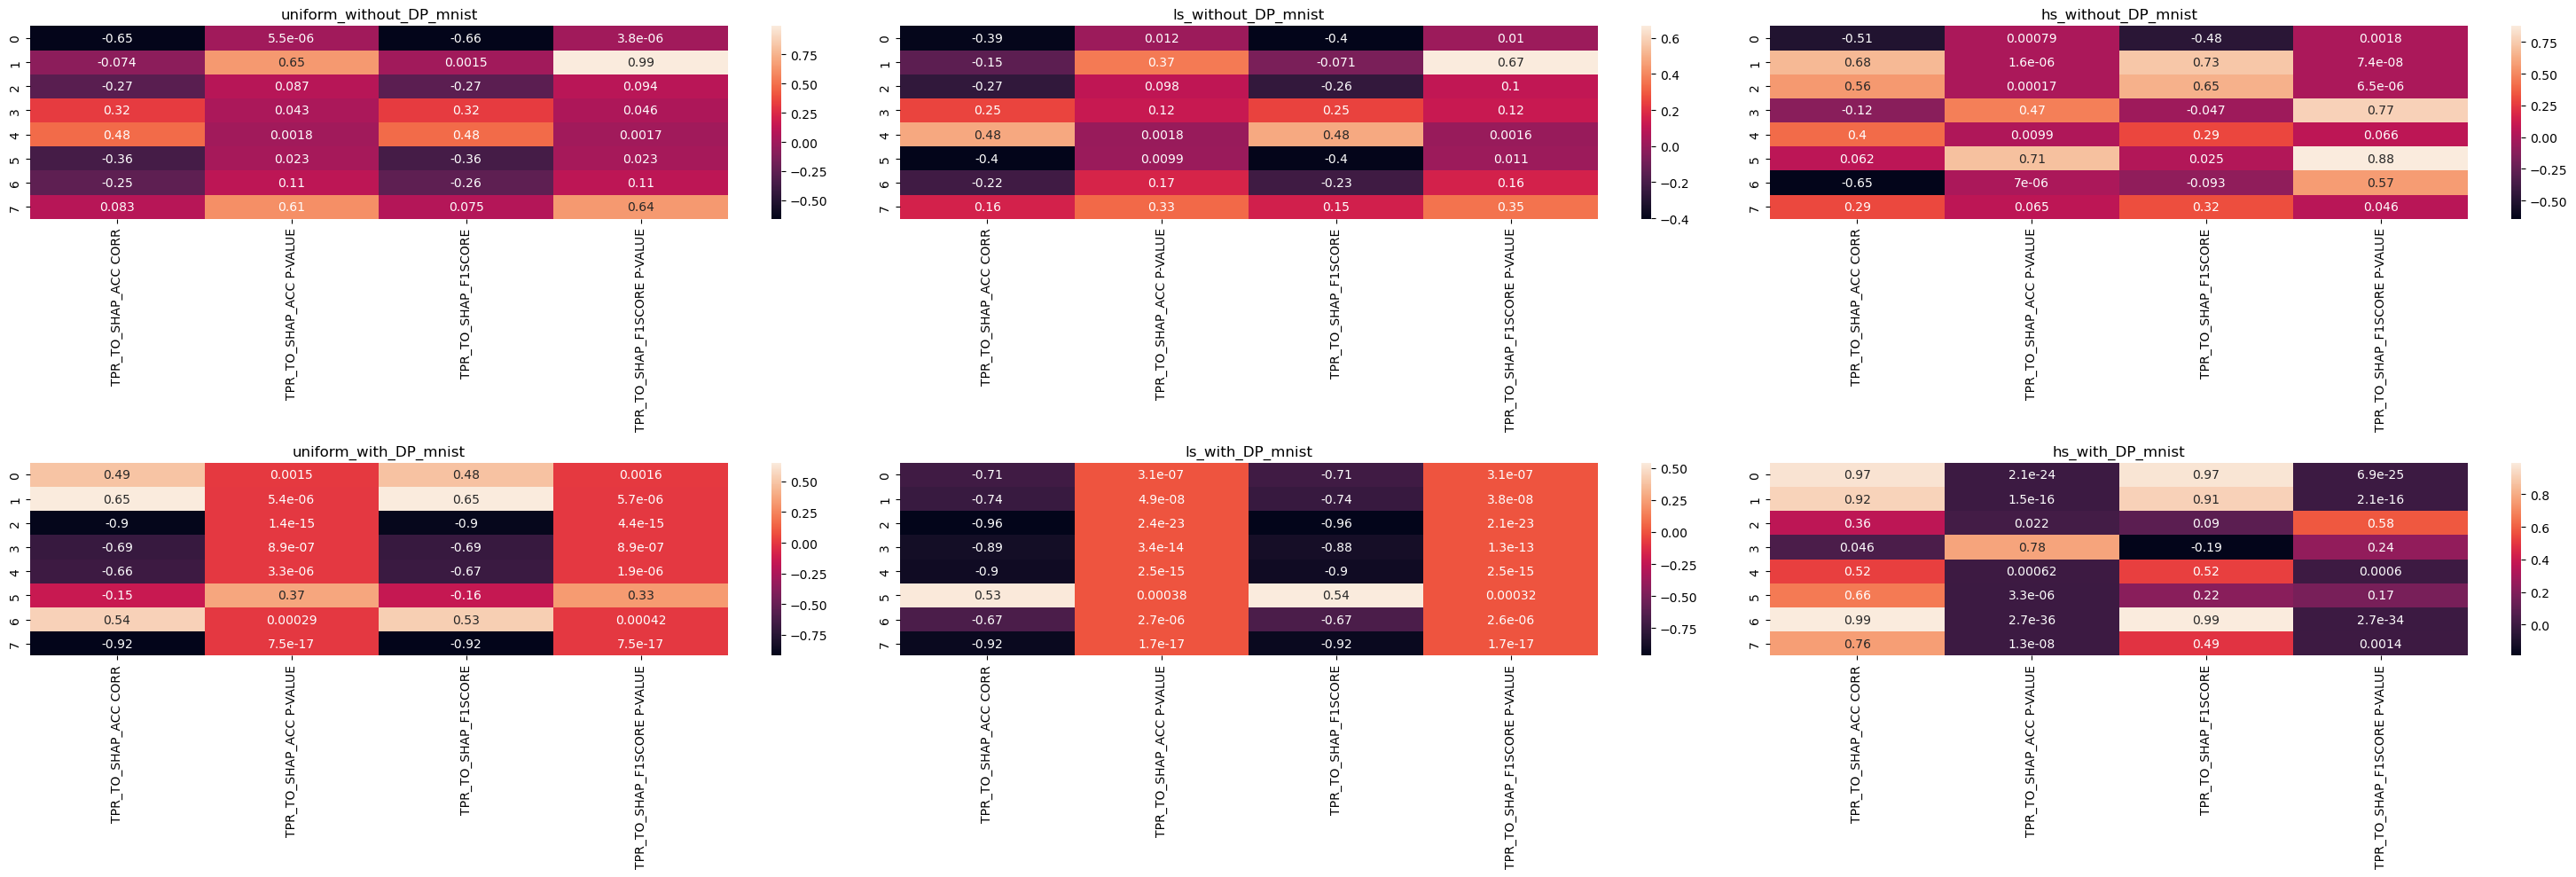

In [25]:
datasets = ['mnist']
scenarios = ['uniform', 'ls', 'hs']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 10))

versions = ['without_DP']
results_wo_DP = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)
corr_wo_DP = calculate_multiple_corr_short(
    results=results_wo_DP,
    no_clients=8,
    mode='spearman'
    )
for (key, item), ax in zip(corr_wo_DP.items(), axes[0,:]):
    sns.heatmap(item, ax=ax, annot=True)
    ax.set_title(key)

versions = ['with_DP']
results_w_DP = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)
corr_w_DP = calculate_multiple_corr_short(
    results=results_w_DP,
    no_clients=8,
    mode='spearman'
    )
for (key, item), ax in zip(corr_w_DP.items(), axes[1,:]):
    sns.heatmap(item, ax=ax, annot=True)
    ax.set_title(key)
    
fig.tight_layout()

## FMNIST

### Pearson

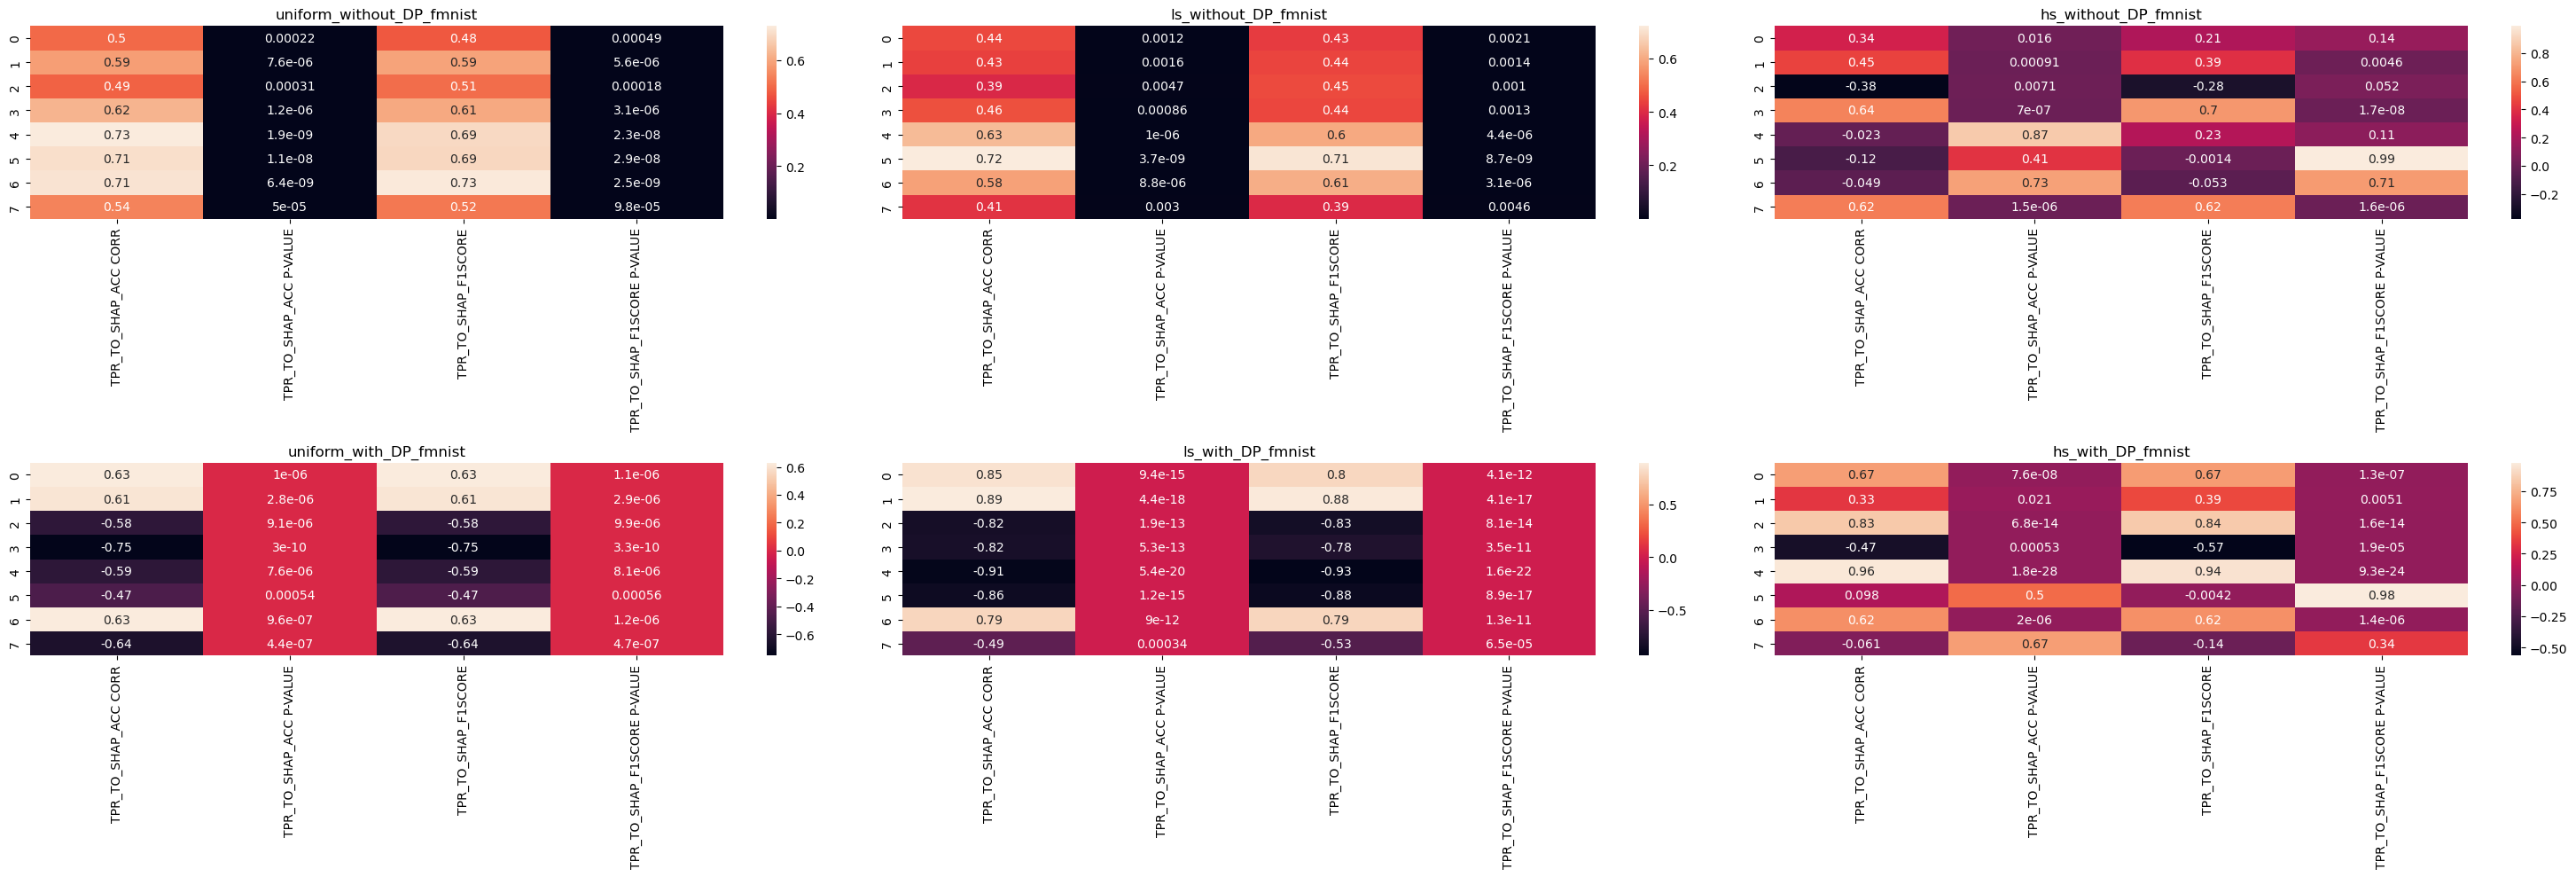

In [26]:
datasets = ['fmnist']
scenarios = ['uniform', 'ls', 'hs']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 10))

versions = ['without_DP']
results_wo_DP = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)
corr_wo_DP = calculate_multiple_corr_short(
    results=results_wo_DP,
    no_clients=8,
    mode='pearson'
    )
for (key, item), ax in zip(corr_wo_DP.items(), axes[0,:]):
    sns.heatmap(item, ax=ax, annot=True)
    ax.set_title(key)

versions = ['with_DP']
results_w_DP = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)
corr_w_DP = calculate_multiple_corr_short(
    results=results_w_DP,
    no_clients=8,
    mode='pearson'
    )
for (key, item), ax in zip(corr_w_DP.items(), axes[1,:]):
    sns.heatmap(item, ax=ax, annot=True)
    ax.set_title(key)
    
fig.tight_layout()

### Spearman

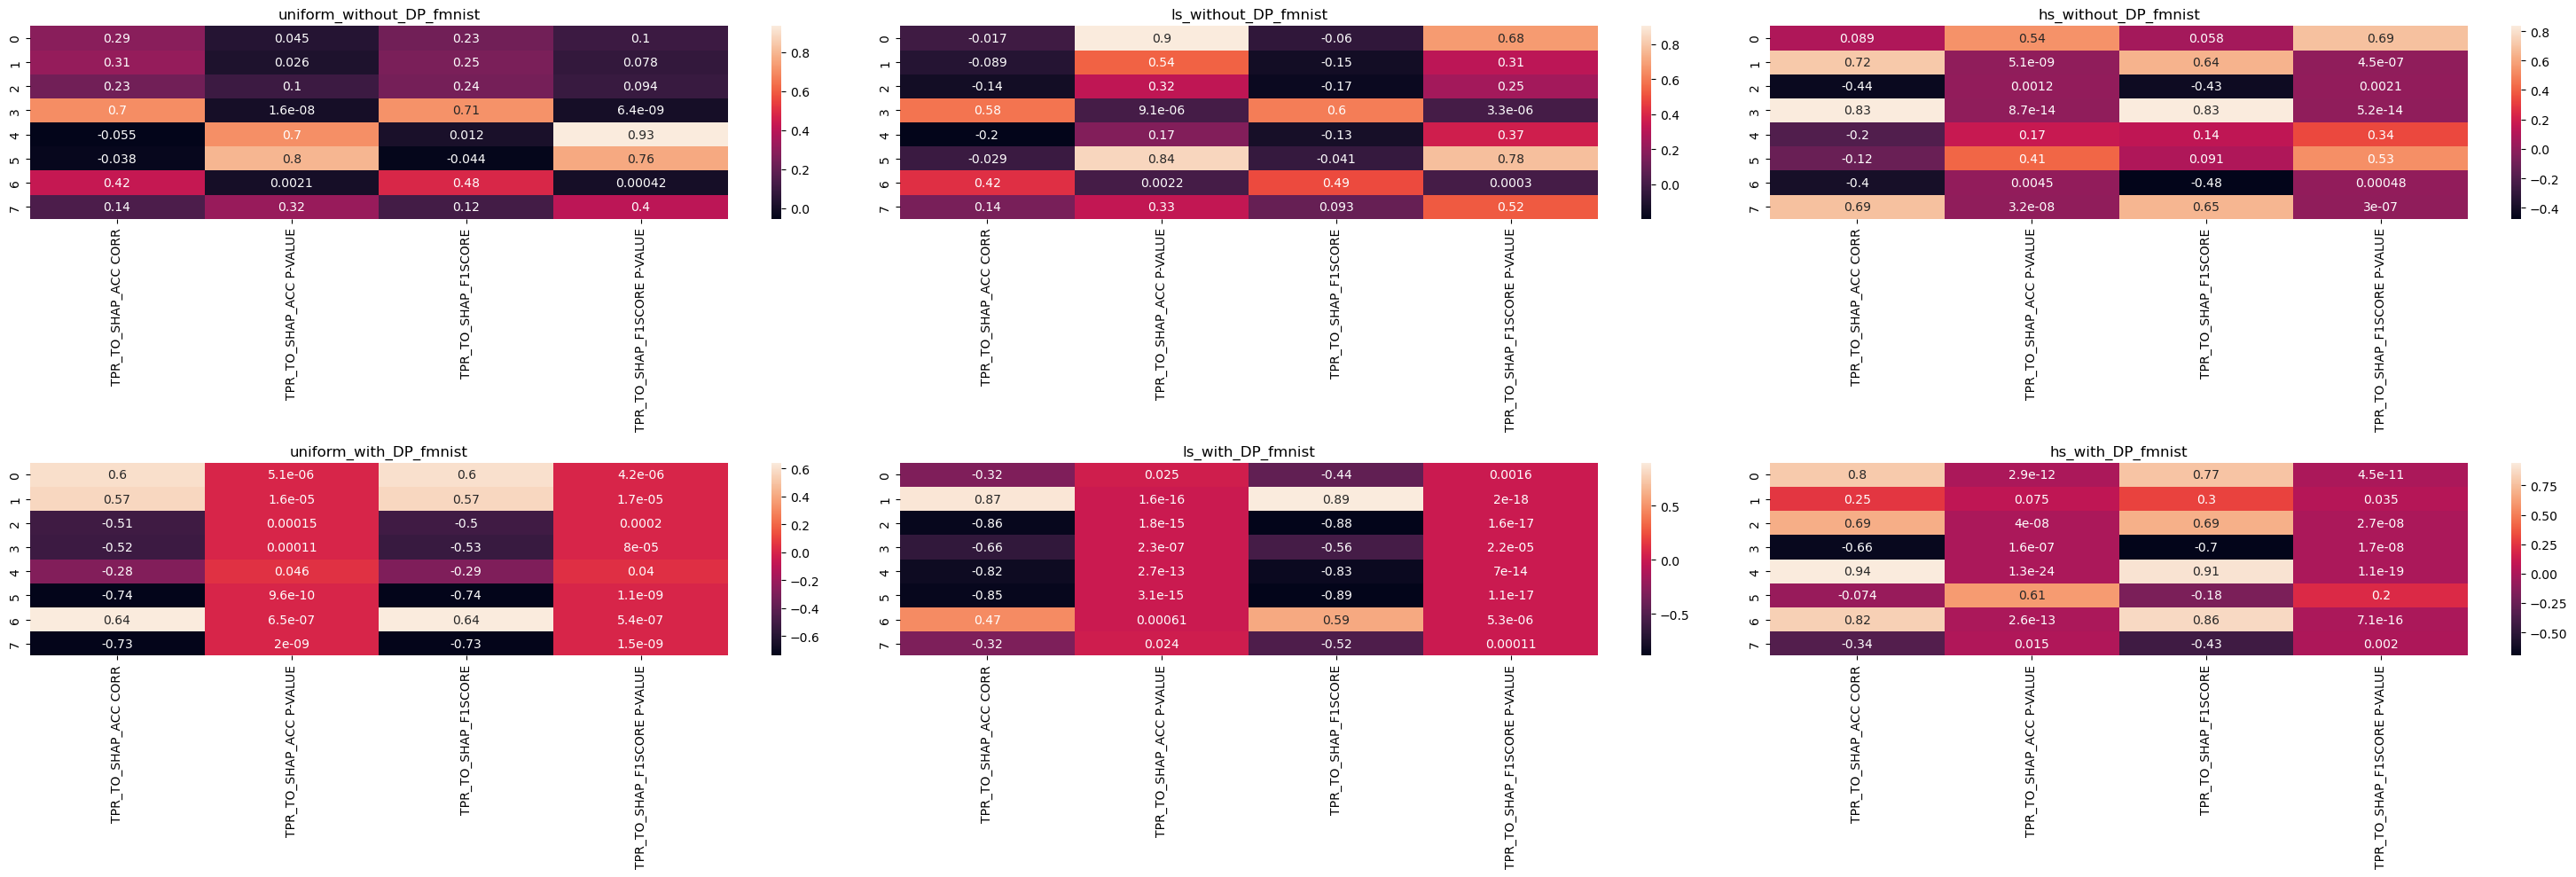

In [27]:
datasets = ['fmnist']
scenarios = ['uniform', 'ls', 'hs']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 10))

versions = ['without_DP']
results_wo_DP = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)
corr_wo_DP = calculate_multiple_corr_short(
    results=results_wo_DP,
    no_clients=8,
    mode='spearman'
    )
for (key, item), ax in zip(corr_wo_DP.items(), axes[0,:]):
    sns.heatmap(item, ax=ax, annot=True)
    ax.set_title(key)

versions = ['with_DP']
results_w_DP = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)
corr_w_DP = calculate_multiple_corr_short(
    results=results_w_DP,
    no_clients=8,
    mode='spearman'
    )
for (key, item), ax in zip(corr_w_DP.items(), axes[1,:]):
    sns.heatmap(item, ax=ax, annot=True)
    ax.set_title(key)
    
fig.tight_layout()

## CIFAR10

### Pearson

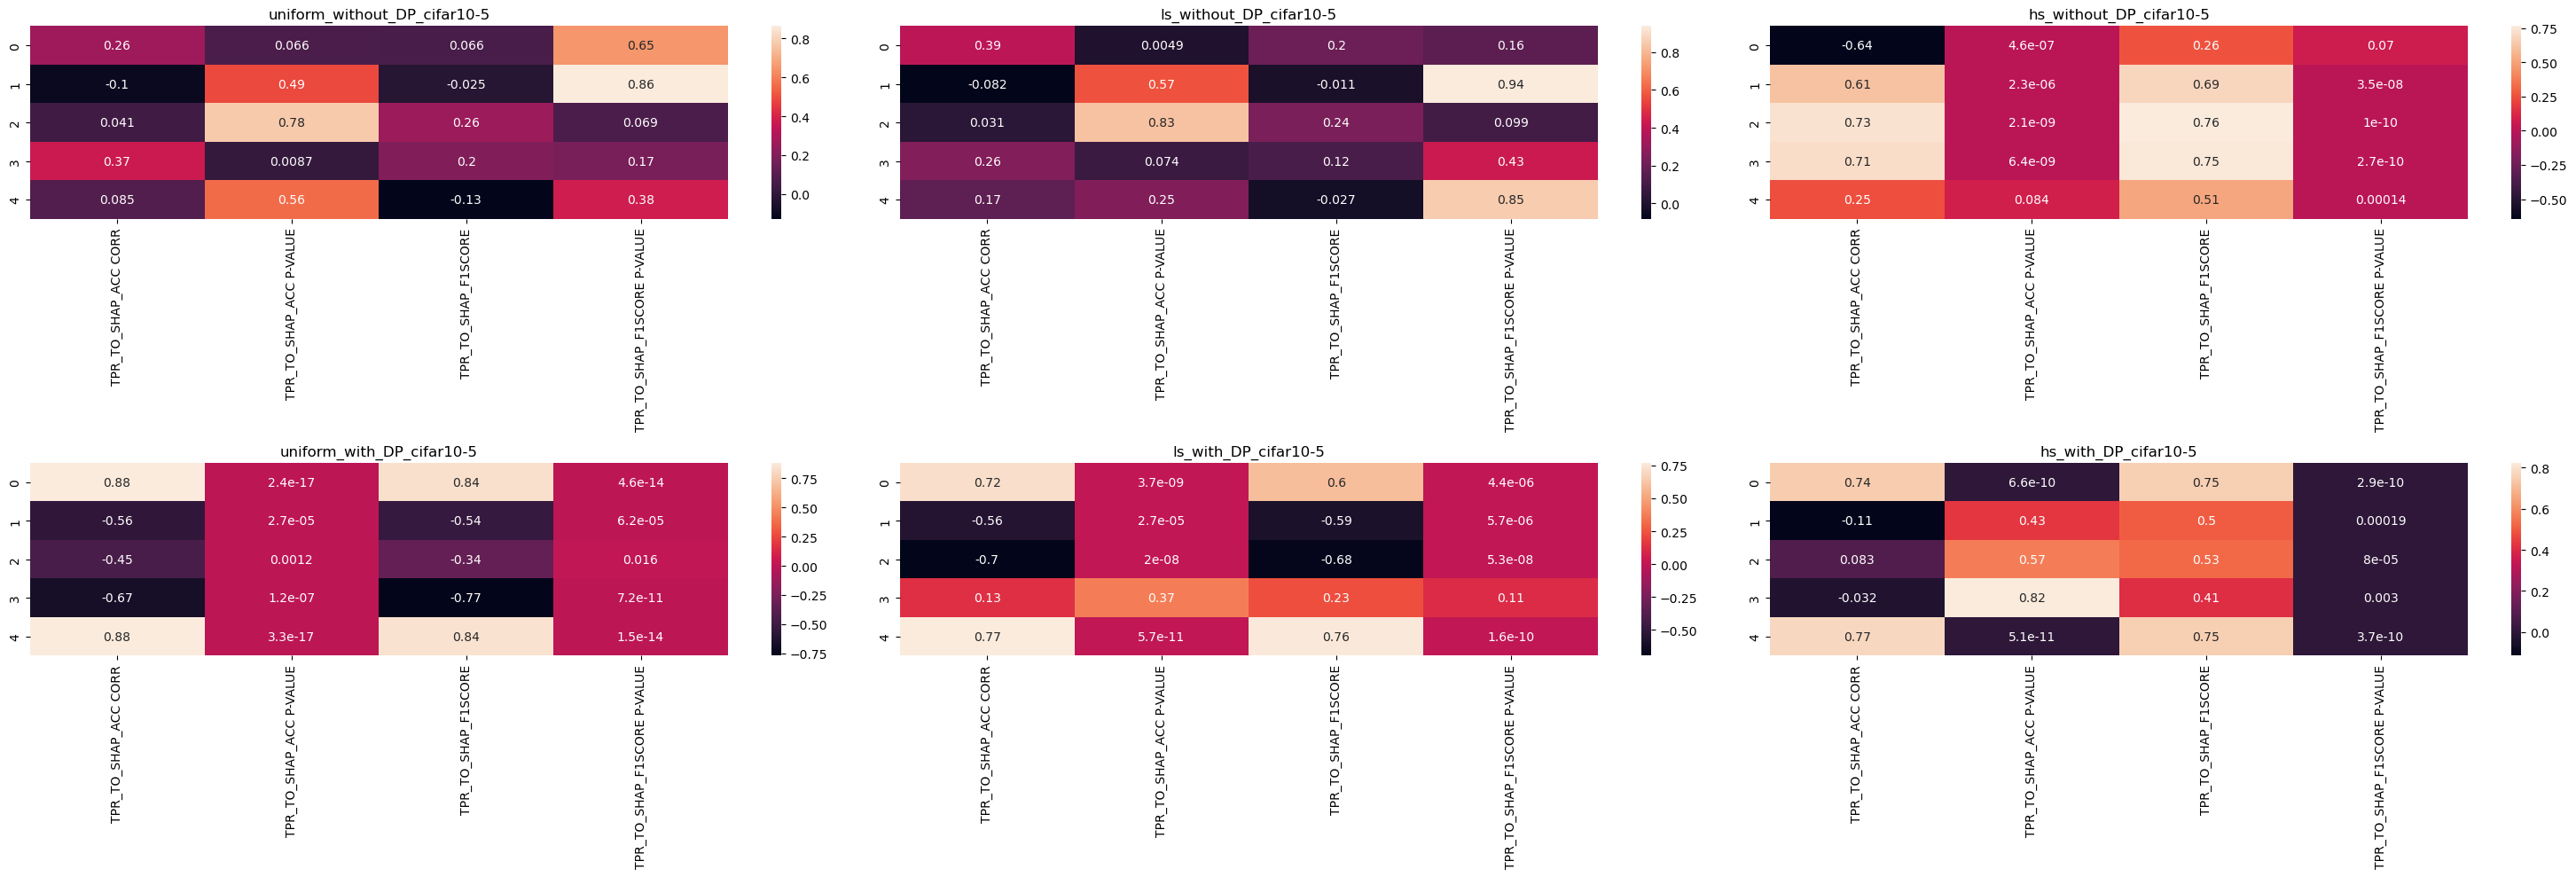

In [29]:
datasets = ['cifar10-5']
scenarios = ['uniform', 'ls', 'hs']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 10))

versions = ['without_DP']
results_wo_DP = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)
corr_wo_DP = calculate_multiple_corr_short(
    results=results_wo_DP,
    no_clients=5,
    mode='pearson'
    )
for (key, item), ax in zip(corr_wo_DP.items(), axes[0,:]):
    sns.heatmap(item, ax=ax, annot=True)
    ax.set_title(key)

versions = ['with_DP']
results_w_DP = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)
corr_w_DP = calculate_multiple_corr_short(
    results=results_w_DP,
    no_clients=5,
    mode='pearson'
    )
for (key, item), ax in zip(corr_w_DP.items(), axes[1,:]):
    sns.heatmap(item, ax=ax, annot=True)
    ax.set_title(key)
    
fig.tight_layout()

### Spearman

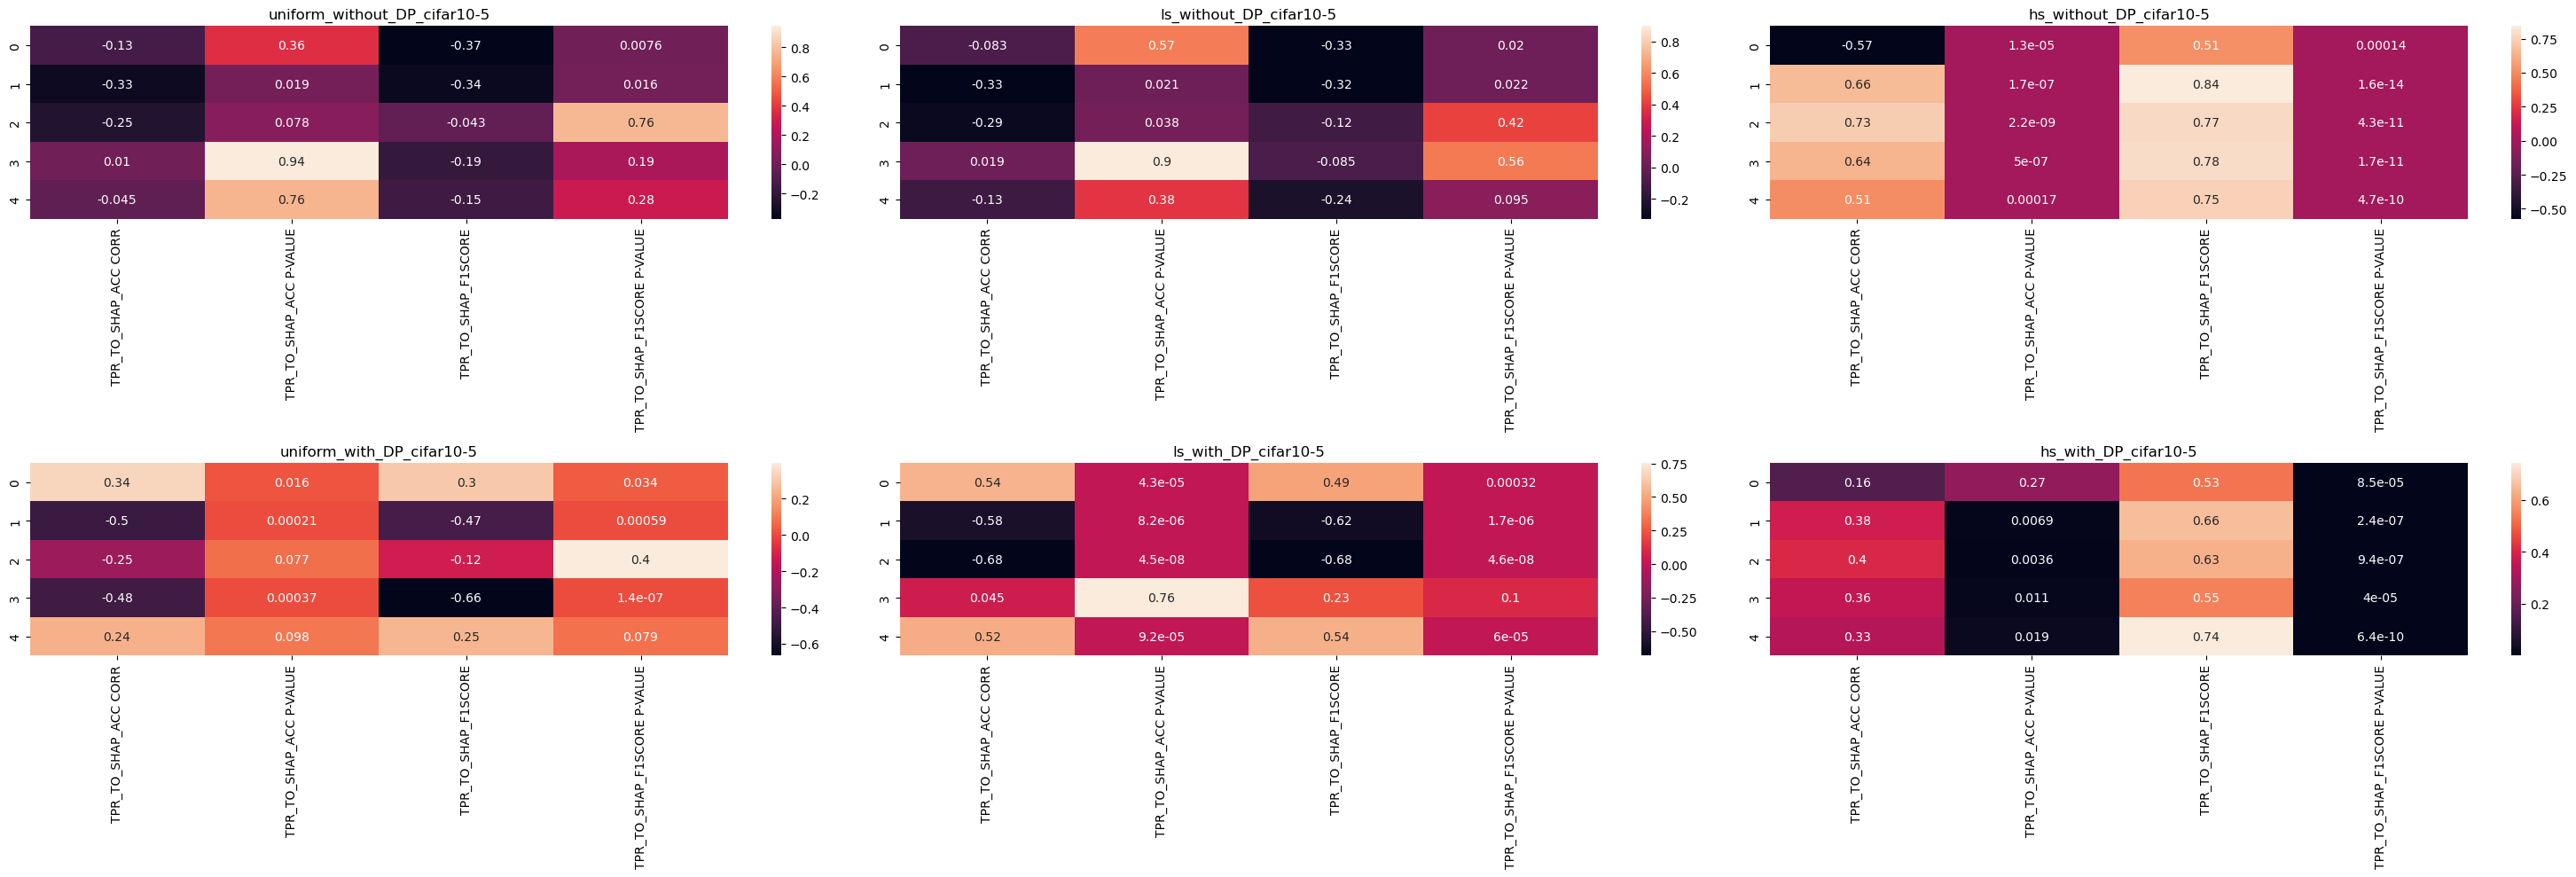

In [31]:
datasets = ['cifar10-5']
scenarios = ['uniform', 'ls', 'hs']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 10))

versions = ['without_DP']
results_wo_DP = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)
corr_wo_DP = calculate_multiple_corr_short(
    results=results_wo_DP,
    no_clients=5,
    mode='spearman'
    )
for (key, item), ax in zip(corr_wo_DP.items(), axes[0,:]):
    sns.heatmap(item, ax=ax, annot=True)
    ax.set_title(key)

versions = ['with_DP']
results_w_DP = load_multiple_contribution_attack_results(
    datasets=datasets,
    scenarios=scenarios,
    versions=versions
)
corr_w_DP = calculate_multiple_corr_short(
    results=results_w_DP,
    no_clients=5,
    mode='spearman'
    )
for (key, item), ax in zip(corr_w_DP.items(), axes[1,:]):
    sns.heatmap(item, ax=ax, annot=True)
    ax.set_title(key)
    
fig.tight_layout()

# Final Conclusions
- It is safe to state that we fail to reject H1 - there is no basis for declaring that it is possible to reject that there is no clear correlation between value of the contribution index (SV) and the success rate of MIA measured by a True Positive Rate when none of the clients employ DP-meachnism.
- It is much more difficult to state that we fail to reject H2 - indeed, there is a visible pattern when analyzing a correlation between SV and TPR of MIA when some clients employ DP mechanism - those clients are then charactertized by a visible positive correlation, when those that do not employ a DP mechanism are characterised by a strong negative correlation.

# Free Observations
- There is clearly no correlation between those two values in a baseline scenario - where the DP is not used. Depending on the data split and the task at hand, sometimes the correlation is positive, sometimes negative and sometimes close to 0. The p-values are also high, indicating that no information about one value can be derived from another.
- The situation changes in the second scenario - where some clients use DP-mechanism. Then, the correlation becomes more evident. Depending on the difficulty of the task and the data split, in some scenarios the correlation is highly visible (e.g. MNIST and FMNIST in Uniform splits), in some other those are less visible (e.g. CIFAR). However, the p-values are also considerably lower in the second case. According to the scipy documentation, "The p-value for a hypothesis test whose null hypothesis is that two samples have no ordinal correlation. See alternative above for alternative hypotheses. pvalue has the same shape as statistic." => this means that in the case of DP, we clearly can reject a hypothesis that those two series are not correlated, at least according to the Pearson tests.
- This opens an interesting topic - we could potentially use SV to amplify the attack when we know that some client use DP => because then the SV can be used to 'shortlist' candidates that are not using DP.